**Machine Learning Approach for finding repurposed drugs against  Glioblastoma**

**Data Retrieval and Pre-Processing**

In [1]:
import os
os.getcwd()

'C:\\Users\\Admin'

In [2]:
os.chdir('D:/GBM_Drug_Screening/KIF20A')

In [3]:
import sys, numpy as np, pandas as pd
from rdkit import rdBase
print("Python:", sys.executable)
print("RDKit:", rdBase.rdkitVersion)
print("NumPy :", np.__version__)
print("pandas:", pd.__version__)

Python: C:\Users\Admin\miniconda3\envs\tfenv\python.exe
RDKit: 2025.03.5
NumPy : 1.26.4
pandas: 2.1.4


In [3]:
from rdkit.Chem import PandasTools
PandasTools.RenderImagesInAllDataFrames(images=True)
PandasTools.AddMoleculeColumnToFrame(output_df, smilesCol="smiles")
output_df.head()

NameError: name 'output_df' is not defined

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt
from chembl_webresource_client.new_client import new_client
from rdkit import Chem
from rdkit.Chem import Descriptors,Lipinski,rdchem

C:\Users\Admin\miniconda3\envs\tfenv\Lib\site-packages\chembl_webresource_client\__init__.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  __version__ = __import__('pkg_resources').get_distribution('chembl_webresource_client').version


In [5]:
#importing libraries
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import tensorflow as tf

In [6]:
!pip install -U "rdkit>=2024.03.1"

   ---------------------------------------- 0.0/23.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/23.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/23.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/23.5 MB ? eta -:--:--
    --------------------------------------- 0.5/23.5 MB 1.0 MB/s eta 0:00:22
   - -------------------------------------- 1.0/23.5 MB 1.7 MB/s eta 0:00:13
   --- ------------------------------------ 2.1/23.5 MB 2.9 MB/s eta 0:00:08
   ----- ---------------------------------- 3.1/23.5 MB 3.4 MB/s eta 0:00:07
   ----- ---------------------------------- 3.1/23.5 MB 3.4 MB/s eta 0:00:07
   ----- ---------------------------------- 3.1/23.5 MB 3.4 MB/s eta 0:00:07
   ------- -------------------------------- 4.2/23.5 MB 2.6 MB/s eta 0:00:08
   ------- -------------------------------- 4.5/23.5 MB 2.4 MB/s eta 0:00:08
   ---------- ----------------------------- 6.3/23.5 MB 3.2 MB/s eta 0:00:06
   ------------ -----------

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.


In [50]:
!pip install "pandas<2.2"

   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.6 MB 2.4 MB/s eta 0:00:05
   --- ------------------------------------ 1.0/10.6 MB 1.9 MB/s eta 0:00:05
   ----- ---------------------------------- 1.6/10.6 MB 2.2 MB/s eta 0:00:05
   ------ --------------------------------- 1.8/10.6 MB 2.0 MB/s eta 0:00:05
   -------- ------------------------------- 2.4/10.6 MB 2.0 MB/s eta 0:00:05
   --------- ------------------------------ 2.6/10.6 MB 2.0 MB/s eta 0:00:05
   ----------- ---------------------------- 3.1/10.6 MB 2.1 MB/s eta 0:00:04
   ------------- -------------------------- 3.7/10.6 MB 2.1 MB/s eta 0:00:04
   ---------------- ----------------------- 4.5/10.6 MB 2.2 MB/s eta 0:00:03
   ----------------- ---------------------- 4.7/10.6 MB 2.2 MB/s eta 0:00:03
   ------------------ --------------------- 5.0/10.6 MB 2.2 MB/s eta 0:00:03
   ----------

  You can safely remove it manually.


In [7]:
import pandas as pd
import math
import rdkit
from tqdm.auto import tqdm
from chembl_webresource_client.new_client import new_client
from pandas import DataFrame
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski, PandasTools
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold
from pathlib import Path
from zipfile import ZipFile
from tempfile import TemporaryDirectory

TypeError: No to_python (by-value) converter found for C++ type: class std::vector<double,class std::allocator<double> >

In [8]:
targets_api = new_client.target
compounds_api = new_client.molecule
bioactivities_api = new_client.activity

In [9]:
type(targets_api)  #show the type of the object

chembl_webresource_client.query_set.QuerySet

In [10]:
uniprot_id = "P52732"    #change the uniprot ID for your project

In [10]:
# Get target information from ChEMBL but restrict it to specified class only
targets = targets_api.get(target_components__accession=uniprot_id).only(              ##variable that contains the results of the query
    "target_chembl_id", "organism", "pref_name", "target_type"
)
print(f'The type of the targets is "{type(targets)}"')

The type of the targets is "<class 'chembl_webresource_client.query_set.QuerySet'>"


In [11]:
targets = pd.DataFrame.from_records(targets)
targets

,organism,pref_name,target_chembl_id,target_type
0,Homo sapiens,Kinesin-like protein 1,CHEMBL4581,SINGLE PROTEIN
1,Homo sapiens,Kinesin-like protein 1,CHEMBL4581,SINGLE PROTEIN


In [12]:
target = targets.iloc[0]
target

organism                      Homo sapiens
pref_name           Kinesin-like protein 1
target_chembl_id                CHEMBL4581
target_type                 SINGLE PROTEIN
Name: 0, dtype: object

In [13]:
chembl_id = target.target_chembl_id
print(f"The target ChEMBL ID is {chembl_id}")

The target ChEMBL ID is CHEMBL4581


In [14]:
bioactivities = bioactivities_api.filter(
    target_chembl_id=chembl_id, type="IC50", relation="=", assay_type="B"
).only(
    "activity_id",
    "assay_chembl_id",
    "assay_description",
    "assay_type",
    "molecule_chembl_id",
    "type",
    "standard_units",
    "relation",
    "standard_value",
    "target_chembl_id",
    "target_organism",
)

print(f"Length and type of bioactivities object: {len(bioactivities)}, {type(bioactivities)}")

Length and type of bioactivities object: 884, <class 'chembl_webresource_client.query_set.QuerySet'>


In [15]:
print(f"Length and type of first element: {len(bioactivities[0])}, {type(bioactivities[0])}")
bioactivities[0]

Length and type of first element: 13, <class 'dict'>


{'activity_id': 1502119,
 'assay_chembl_id': 'CHEMBL831535',
 'assay_description': 'In vitro inhibitory concentration towards kinesin spindle protein activity of ATP hydrolysis in the presence of microtubules measured by ATPase assay (n=3)',
 'assay_type': 'B',
 'molecule_chembl_id': 'CHEMBL194980',
 'relation': '=',
 'standard_units': 'nM',
 'standard_value': '250.0',
 'target_chembl_id': 'CHEMBL4581',
 'target_organism': 'Homo sapiens',
 'type': 'IC50',
 'units': 'nM',
 'value': '250.0'}

In [16]:
bioactivities_df = pd.DataFrame.from_dict(bioactivities)
print(f"DataFrame shape: {bioactivities_df.shape}")
bioactivities_df.head()

DataFrame shape: (884, 13)


,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type,units,value
0,1502119,CHEMBL831535,In vitro inhibitory concentration towards kine...,B,CHEMBL194980,=,nM,250.0,CHEMBL4581,Homo sapiens,IC50,nM,250.0
1,1502120,CHEMBL831535,In vitro inhibitory concentration towards kine...,B,CHEMBL365553,=,nM,1800.0,CHEMBL4581,Homo sapiens,IC50,nM,1800.0
2,1502218,CHEMBL831535,In vitro inhibitory concentration towards kine...,B,CHEMBL195760,=,nM,3600.0,CHEMBL4581,Homo sapiens,IC50,nM,3600.0
3,1502219,CHEMBL831535,In vitro inhibitory concentration towards kine...,B,CHEMBL381219,=,nM,6900.0,CHEMBL4581,Homo sapiens,IC50,nM,6900.0
4,1502221,CHEMBL831535,In vitro inhibitory concentration towards kine...,B,CHEMBL364452,=,nM,450.0,CHEMBL4581,Homo sapiens,IC50,nM,450.0


In [17]:
bioactivities_df['units'].unique()

array(['nM', 'uM', 'umol/L', 'nmol/L'], dtype=object)

In [18]:
bioactivities_df.drop(["units", "value"], axis=1, inplace=True)
bioactivities_df.head()

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type
0,1502119,CHEMBL831535,In vitro inhibitory concentration towards kine...,B,CHEMBL194980,=,nM,250.0,CHEMBL4581,Homo sapiens,IC50
1,1502120,CHEMBL831535,In vitro inhibitory concentration towards kine...,B,CHEMBL365553,=,nM,1800.0,CHEMBL4581,Homo sapiens,IC50
2,1502218,CHEMBL831535,In vitro inhibitory concentration towards kine...,B,CHEMBL195760,=,nM,3600.0,CHEMBL4581,Homo sapiens,IC50
3,1502219,CHEMBL831535,In vitro inhibitory concentration towards kine...,B,CHEMBL381219,=,nM,6900.0,CHEMBL4581,Homo sapiens,IC50
4,1502221,CHEMBL831535,In vitro inhibitory concentration towards kine...,B,CHEMBL364452,=,nM,450.0,CHEMBL4581,Homo sapiens,IC50


In [19]:
bioactivities_df.dtypes

activity_id            int64
assay_chembl_id       object
assay_description     object
assay_type            object
molecule_chembl_id    object
relation              object
standard_units        object
standard_value        object
target_chembl_id      object
target_organism       object
type                  object
dtype: object

In [20]:
bioactivities_df = bioactivities_df.astype({"standard_value" : "float64"})

In [21]:
bioactivities_df.dtypes

activity_id             int64
assay_chembl_id        object
assay_description      object
assay_type             object
molecule_chembl_id     object
relation               object
standard_units         object
standard_value        float64
target_chembl_id       object
target_organism        object
type                   object
dtype: object

**Delete entries with missing values**

In [22]:
bioactivities_df.dropna(axis=0, how="any", inplace=True)   #drop rows which contain missing values
print(f"DataFrame shape: {bioactivities_df.shape}")

DataFrame shape: (884, 11)


**Keep only entries with “standard_unit == nM”**

In [23]:
print(f"Units in downloaded data: {bioactivities_df['standard_units'].unique()}")
print(
    f"Number of non-nM entries:\
    {bioactivities_df[bioactivities_df['standard_units'] != 'nM'].shape[0]}"
)

Units in downloaded data: ['nM']
Number of non-nM entries:    0


In [24]:
bioactivities_df = bioactivities_df[bioactivities_df["standard_units"] == "nM"]
print(f"Units after filtering: {bioactivities_df['standard_units'].unique()}")

Units after filtering: ['nM']


In [25]:
print(f"DataFrame shape: {bioactivities_df.shape}")

DataFrame shape: (884, 11)


**Delete duplicate molecules**

In [26]:
bioactivities_df.drop_duplicates("molecule_chembl_id", keep="first", inplace=True)
print(f"DataFrame shape: {bioactivities_df.shape}")

DataFrame shape: (772, 11)


**Reset “DataFrame” index**

In [27]:
bioactivities_df.reset_index(drop=True, inplace=True)
bioactivities_df.head()

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type
0,1502119,CHEMBL831535,In vitro inhibitory concentration towards kine...,B,CHEMBL194980,=,nM,250.0,CHEMBL4581,Homo sapiens,IC50
1,1502120,CHEMBL831535,In vitro inhibitory concentration towards kine...,B,CHEMBL365553,=,nM,1800.0,CHEMBL4581,Homo sapiens,IC50
2,1502218,CHEMBL831535,In vitro inhibitory concentration towards kine...,B,CHEMBL195760,=,nM,3600.0,CHEMBL4581,Homo sapiens,IC50
3,1502219,CHEMBL831535,In vitro inhibitory concentration towards kine...,B,CHEMBL381219,=,nM,6900.0,CHEMBL4581,Homo sapiens,IC50
4,1502221,CHEMBL831535,In vitro inhibitory concentration towards kine...,B,CHEMBL364452,=,nM,450.0,CHEMBL4581,Homo sapiens,IC50


**Rename columns**

In [28]:
bioactivities_df.rename(
    columns={"standard_value": "IC50", "standard_units": "units"}, inplace=True
)
bioactivities_df.head()

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,units,IC50,target_chembl_id,target_organism,type
0,1502119,CHEMBL831535,In vitro inhibitory concentration towards kine...,B,CHEMBL194980,=,nM,250.0,CHEMBL4581,Homo sapiens,IC50
1,1502120,CHEMBL831535,In vitro inhibitory concentration towards kine...,B,CHEMBL365553,=,nM,1800.0,CHEMBL4581,Homo sapiens,IC50
2,1502218,CHEMBL831535,In vitro inhibitory concentration towards kine...,B,CHEMBL195760,=,nM,3600.0,CHEMBL4581,Homo sapiens,IC50
3,1502219,CHEMBL831535,In vitro inhibitory concentration towards kine...,B,CHEMBL381219,=,nM,6900.0,CHEMBL4581,Homo sapiens,IC50
4,1502221,CHEMBL831535,In vitro inhibitory concentration towards kine...,B,CHEMBL364452,=,nM,450.0,CHEMBL4581,Homo sapiens,IC50


In [29]:
print(f"DataFrame shape: {bioactivities_df.shape}")

DataFrame shape: (772, 11)


**Fetch compound data from ChEMBL**

In [30]:
compounds_provider = compounds_api.filter(
    molecule_chembl_id__in=list(bioactivities_df["molecule_chembl_id"])
).only("molecule_chembl_id", "molecule_structures")

**Download compound data from ChEMBL**

In [31]:
compounds = list(tqdm(compounds_provider))

  0%|          | 0/772 [00:00<?, ?it/s]

In [32]:
compounds_df = pd.DataFrame.from_records(
    compounds,
)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (772, 2)


In [33]:
compounds_df.head()

,molecule_chembl_id,molecule_structures
0,CHEMBL51483,{'canonical_smiles': 'Cc1cc2c(C(C)C)c(O)c(O)c(...
1,CHEMBL370051,{'canonical_smiles': 'CCC(=O)N1N=C(c2ccccc2Cl)...
2,CHEMBL194147,{'canonical_smiles': 'CC(C)C(=O)N1N=C(c2ccccc2...
3,CHEMBL365108,{'canonical_smiles': 'CC(=O)N1N=C(c2cc(F)ccc2F...
4,CHEMBL370956,{'canonical_smiles': 'CC(C)(C)C(=O)N1N=C(c2ccc...


Preprocess and filter compound data

Remove entries with missing molecule structure entry

In [34]:
compounds_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (772, 2)


Delete duplicate molecules

In [35]:
compounds_df.drop_duplicates("molecule_chembl_id", keep="first", inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (772, 2)


Get molecules with canonical SMILES

In [36]:
compounds_df.iloc[0].molecule_structures.keys()

dict_keys(['canonical_smiles', 'molfile', 'standard_inchi', 'standard_inchi_key'])

In [37]:
canonical_smiles = []

for i, compounds in compounds_df.iterrows():
    try:
        canonical_smiles.append(compounds["molecule_structures"]["canonical_smiles"])
    except KeyError:
        canonical_smiles.append(None)

compounds_df["smiles"] = canonical_smiles
compounds_df.drop("molecule_structures", axis=1, inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (772, 2)


In [38]:
compounds_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (772, 2)


Summary of compound and bioactivity data

In [39]:
print(f"Bioactivities filtered: {bioactivities_df.shape[0]}")
bioactivities_df.columns

Bioactivities filtered: 772


Index(['activity_id', 'assay_chembl_id', 'assay_description', 'assay_type',
       'molecule_chembl_id', 'relation', 'units', 'IC50', 'target_chembl_id',
       'target_organism', 'type'],
      dtype='object')

In [40]:
print(f"Compounds filtered: {compounds_df.shape[0]}")
compounds_df.columns

Compounds filtered: 772


Index(['molecule_chembl_id', 'smiles'], dtype='object')

Merge both datasets

In [41]:
# Merge DataFrames
output_df = pd.merge(
    bioactivities_df[["molecule_chembl_id", "IC50", "units"]],
    compounds_df,
    on="molecule_chembl_id",
)

# Reset row indices
output_df.reset_index(drop=True, inplace=True)

print(f"Dataset with {output_df.shape[0]} entries.")
     

Dataset with 772 entries.


In [42]:
output_df.dtypes

molecule_chembl_id     object
IC50                  float64
units                  object
smiles                 object
dtype: object

In [43]:
output_df

,molecule_chembl_id,IC50,units,smiles
0,CHEMBL194980,250.0,nM,CC(=S)N1N=C(c2cc(F)ccc2F)CC1c1ccccc1
1,CHEMBL365553,1800.0,nM,CS(=O)(=O)N1N=C(c2cc(F)ccc2F)CC1c1ccccc1
2,CHEMBL195760,3600.0,nM,CC(=O)N1N=C(c2ccccc2Cl)CC1c1ccccc1
3,CHEMBL381219,6900.0,nM,CC(=O)N1N=C(c2ccccc2)CC1c1cccc(O)c1
4,CHEMBL364452,450.0,nM,CC(=O)N1N=C(c2ccccc2Cl)CC1c1cccc(O)c1
...,...,...,...,...
767,CHEMBL4756522,239.0,nM,N[C@@H](CCC(=O)C[C@@H](CSC1(c2ccc(C(F)(F)F)cc2...
768,CHEMBL5272233,13370.0,nM,O=C(NNC(=S)Nc1ccc(Br)cc1)c1cc2c([nH]c3ccccc32)...
769,CHEMBL5279607,8730.0,nM,CSc1nnc(-c2cc3c([nH]c4ccccc43)c(-c3cccc(O)c3)n...
770,CHEMBL5270699,8910.0,nM,Cc1ccc(-n2c(-c3cc4c([nH]c5ccccc54)c(-c4cccc(O)...


Add pIC50 values

In [44]:
def convert_ic50_to_pic50(IC50_value):
    pIC50_value = 9 - math.log10(IC50_value)
    return pIC50_value

In [45]:
# Apply conversion to each row of the compounds DataFrame
output_df["pIC50"] = output_df.apply(lambda x: convert_ic50_to_pic50(x.IC50), axis=1)
output_df.head()     

,molecule_chembl_id,IC50,units,smiles,pIC50
0,CHEMBL194980,250.0,nM,CC(=S)N1N=C(c2cc(F)ccc2F)CC1c1ccccc1,6.602060
1,CHEMBL365553,1800.0,nM,CS(=O)(=O)N1N=C(c2cc(F)ccc2F)CC1c1ccccc1,5.744727
2,CHEMBL195760,3600.0,nM,CC(=O)N1N=C(c2ccccc2Cl)CC1c1ccccc1,5.443697
3,CHEMBL381219,6900.0,nM,CC(=O)N1N=C(c2ccccc2)CC1c1cccc(O)c1,5.161151
4,CHEMBL364452,450.0,nM,CC(=O)N1N=C(c2ccccc2Cl)CC1c1cccc(O)c1,6.346787


array([[<Axes: title={'center': 'pIC50'}>]], dtype=object)

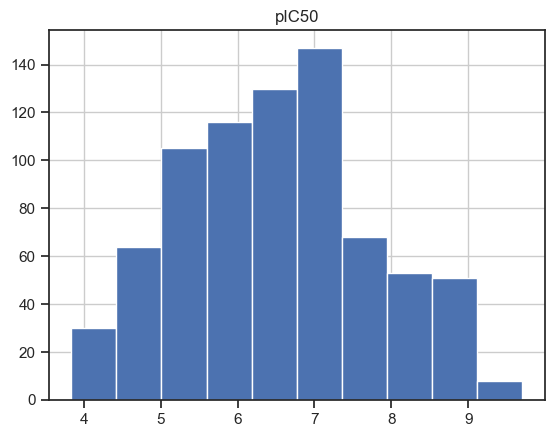

In [46]:
output_df.hist(column="pIC50")

In [47]:
from rdkit.Chem import PandasTools


In [48]:
# Add molecule column
from rdkit.Chem import PandasTools
PandasTools.RenderImagesInAllDataFrames(images=True)
PandasTools.AddMoleculeColumnToFrame(output_df, smilesCol='smiles')

In [49]:
PandasTools.AddMoleculeColumnToFrame(output_df, smilesCol="smiles")

In [50]:
# Sort molecules by pIC50
output_df.sort_values(by="pIC50", ascending=False, inplace=True)

In [51]:
# Reset index
output_df.reset_index(drop=True, inplace=True)

,molecule_chembl_id,IC50,units,pIC50,ROMol
0,CHEMBL247044,0.20,nM,9.698970,
1,CHEMBL4239814,0.20,nM,9.698970,
2,CHEMBL398478,0.40,nM,9.397940,
3,CHEMBL250127,0.50,nM,9.301030,
4,CHEMBL206115,0.50,nM,9.301030,
5,CHEMBL3645244,0.60,nM,9.221849,
6,CHEMBL3645253,0.69,nM,9.161151,
7,CHEMBL3645243,0.74,nM,9.130768,
8,CHEMBL400042,0.82,nM,9.086186,
9,CHEMBL3645246,0.83,nM,9.080922,

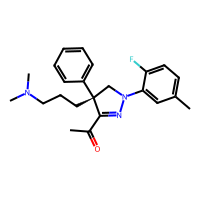
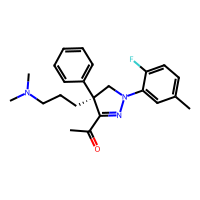
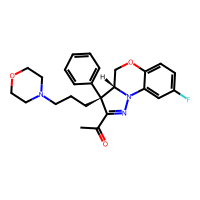
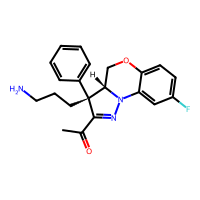
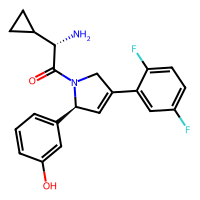
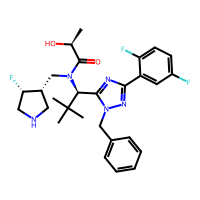
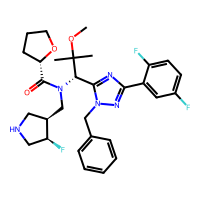
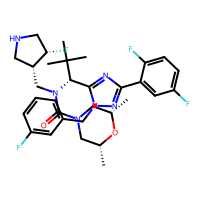
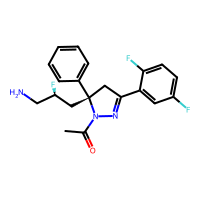
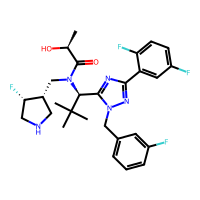

In [52]:
output_df.drop("smiles", axis=1).head(10)

,molecule_chembl_id,IC50,units,smiles,pIC50,ROMol
0,CHEMBL247044,0.2,nM,CC(=O)C1=NN(c2cc(C)ccc2F)C[C@@]1(CCCN(C)C)c1cc...,9.698970,
1,CHEMBL4239814,0.2,nM,CC(=O)C1=NN(c2cc(C)ccc2F)C[C@]1(CCCN(C)C)c1ccccc1,9.698970,
2,CHEMBL398478,0.4,nM,CC(=O)C1=NN2c3cc(F)ccc3OC[C@H]2[C@@]1(CCCN1CCO...,9.397940,
3,CHEMBL250127,0.5,nM,CC(=O)C1=NN2c3cc(F)ccc3OC[C@H]2[C@@]1(CCCN)c1c...,9.301030,
4,CHEMBL206115,0.5,nM,N[C@H](C(=O)N1CC(c2cc(F)ccc2F)=C[C@H]1c1cccc(O...,9.301030,
...,...,...,...,...,...,...
767,CHEMBL4239414,120000.0,nM,CC(=O)N1N=C(NC2=NC(=O)/C(=C/c3ccco3)S2)SC1(C)c...,3.920819,
768,CHEMBL4251217,120000.0,nM,CC(=O)N1N=C(NC2=NC(=O)/C(=C/c3ccccn3)S2)SC1(C)...,3.920819,
769,CHEMBL4244405,128700.0,nM,CC(=O)N1N=C(NC2=NC(=O)/C(=C/C=C/c3ccc(N(C)C)cc...,3.890421,
770,CHEMBL4246927,133500.0,nM,CC(=O)N1N=C(NC2=NC(=O)/C(=C/c3cccs3)S2)SC1(C)c...,3.874519,

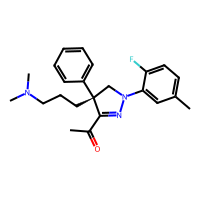
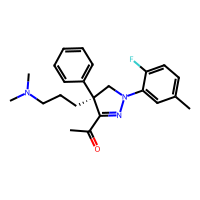
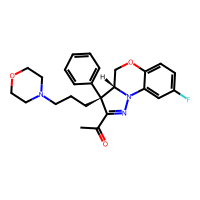
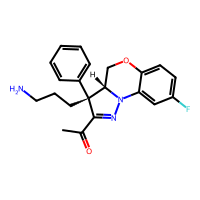
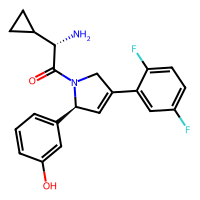
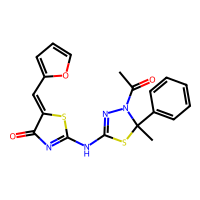
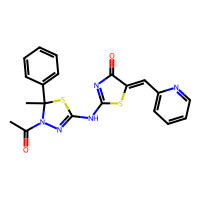
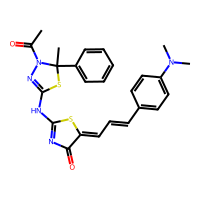
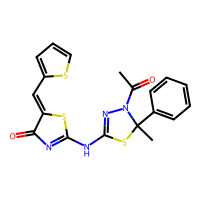
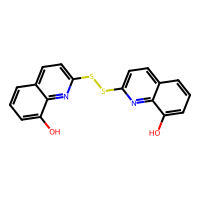

In [53]:
output_df

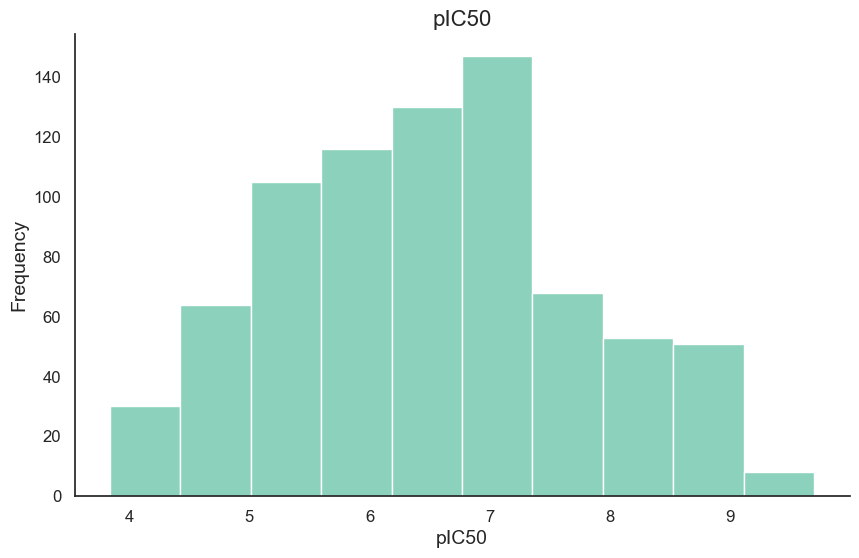

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
sns.set_palette("Set2")
plt.figure(figsize=(10, 6))
sns.histplot(output_df["pIC50"], bins=10, kde=False)
plt.title("pIC50", fontsize=16)
plt.xlabel("pIC50", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)
sns.despine()
plt.savefig("pIC50_histogram.png", dpi=600)
plt.show()

In [55]:
bioactivity_threshold = []
for i in output_df.IC50:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [56]:
# Prepare saving the dataset: Drop the ROMol column
output_df = output_df.drop("ROMol", axis=1)
print(f"DataFrame shape: {output_df.shape}")

DataFrame shape: (772, 5)


In [57]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df2 = pd.concat([output_df, bioactivity_class], axis=1)
df2

,molecule_chembl_id,IC50,units,smiles,pIC50,class
0,CHEMBL247044,0.2,nM,CC(=O)C1=NN(c2cc(C)ccc2F)C[C@@]1(CCCN(C)C)c1cc...,9.698970,active
1,CHEMBL4239814,0.2,nM,CC(=O)C1=NN(c2cc(C)ccc2F)C[C@]1(CCCN(C)C)c1ccccc1,9.698970,active
2,CHEMBL398478,0.4,nM,CC(=O)C1=NN2c3cc(F)ccc3OC[C@H]2[C@@]1(CCCN1CCO...,9.397940,active
3,CHEMBL250127,0.5,nM,CC(=O)C1=NN2c3cc(F)ccc3OC[C@H]2[C@@]1(CCCN)c1c...,9.301030,active
4,CHEMBL206115,0.5,nM,N[C@H](C(=O)N1CC(c2cc(F)ccc2F)=C[C@H]1c1cccc(O...,9.301030,active
...,...,...,...,...,...,...
767,CHEMBL4239414,120000.0,nM,CC(=O)N1N=C(NC2=NC(=O)/C(=C/c3ccco3)S2)SC1(C)c...,3.920819,inactive
768,CHEMBL4251217,120000.0,nM,CC(=O)N1N=C(NC2=NC(=O)/C(=C/c3ccccn3)S2)SC1(C)...,3.920819,inactive
769,CHEMBL4244405,128700.0,nM,CC(=O)N1N=C(NC2=NC(=O)/C(=C/C=C/c3ccc(N(C)C)cc...,3.890421,inactive
770,CHEMBL4246927,133500.0,nM,CC(=O)N1N=C(NC2=NC(=O)/C(=C/c3cccs3)S2)SC1(C)c...,3.874519,inactive


In [61]:
df2.to_csv("KIF11_compounds.csv")
df2.head()

,molecule_chembl_id,IC50,units,smiles,pIC50,class
0,CHEMBL247044,0.2,nM,CC(=O)C1=NN(c2cc(C)ccc2F)C[C@@]1(CCCN(C)C)c1cc...,9.69897,active
1,CHEMBL4239814,0.2,nM,CC(=O)C1=NN(c2cc(C)ccc2F)C[C@]1(CCCN(C)C)c1ccccc1,9.69897,active
2,CHEMBL398478,0.4,nM,CC(=O)C1=NN2c3cc(F)ccc3OC[C@H]2[C@@]1(CCCN1CCO...,9.39794,active
3,CHEMBL250127,0.5,nM,CC(=O)C1=NN2c3cc(F)ccc3OC[C@H]2[C@@]1(CCCN)c1c...,9.30103,active
4,CHEMBL206115,0.5,nM,N[C@H](C(=O)N1CC(c2cc(F)ccc2F)=C[C@H]1c1cccc(O...,9.30103,active


In [58]:
print(f"DataFrame shape: {df2.shape}")

DataFrame shape: (772, 6)


**Lipinski Descriptors for ADMET Analysis**

In [59]:
from pathlib import Path
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski, Draw, PandasTools

In [60]:
molecules = pd.read_csv("KIF11_compounds.csv", index_col=0)
print(molecules.shape)
molecules.head()

(772, 6)


,molecule_chembl_id,IC50,units,smiles,pIC50,class
0,CHEMBL247044,0.2,nM,CC(=O)C1=NN(c2cc(C)ccc2F)C[C@@]1(CCCN(C)C)c1cc...,9.69897,active
1,CHEMBL4239814,0.2,nM,CC(=O)C1=NN(c2cc(C)ccc2F)C[C@]1(CCCN(C)C)c1ccccc1,9.69897,active
2,CHEMBL398478,0.4,nM,CC(=O)C1=NN2c3cc(F)ccc3OC[C@H]2[C@@]1(CCCN1CCO...,9.39794,active
3,CHEMBL250127,0.5,nM,CC(=O)C1=NN2c3cc(F)ccc3OC[C@H]2[C@@]1(CCCN)c1c...,9.30103,active
4,CHEMBL206115,0.5,nM,N[C@H](C(=O)N1CC(c2cc(F)ccc2F)=C[C@H]1c1cccc(O...,9.30103,active


In [61]:
molecules['class'].value_counts()

class
active          505
intermediate    176
inactive         91
Name: count, dtype: int64

In [62]:
def lipinski(smiles, verbose=False):
    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["molecular_weight","logp","n_hbd","n_hba"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors
def lipinski_pass(row):
    return row['molecular_weight'] <= 500 and \
           row['logp'] <= 5 and \
           row['n_hbd'] <= 5 and \
           row['n_hba'] <= 10
ro5_properties = lipinski(molecules.smiles)
ro5_properties['passes_ro5'] = ro5_properties.apply(lipinski_pass, axis=1)

In [63]:
ro5_properties

,molecular_weight,logp,n_hbd,n_hba,passes_ro5
0,381.495,4.17892,0.0,4.0,True
1,381.495,4.17892,0.0,4.0,True
2,437.515,3.40210,0.0,6.0,True
3,367.424,3.02860,1.0,5.0,True
4,370.399,3.37460,2.0,3.0,True
...,...,...,...,...,...
767,412.496,3.57870,1.0,7.0,True
768,423.523,3.38070,1.0,7.0,True
769,491.642,4.60790,1.0,7.0,True
770,428.564,4.04720,1.0,7.0,True


In [64]:
molecules

,molecule_chembl_id,IC50,units,smiles,pIC50,class
0,CHEMBL247044,0.2,nM,CC(=O)C1=NN(c2cc(C)ccc2F)C[C@@]1(CCCN(C)C)c1cc...,9.698970,active
1,CHEMBL4239814,0.2,nM,CC(=O)C1=NN(c2cc(C)ccc2F)C[C@]1(CCCN(C)C)c1ccccc1,9.698970,active
2,CHEMBL398478,0.4,nM,CC(=O)C1=NN2c3cc(F)ccc3OC[C@H]2[C@@]1(CCCN1CCO...,9.397940,active
3,CHEMBL250127,0.5,nM,CC(=O)C1=NN2c3cc(F)ccc3OC[C@H]2[C@@]1(CCCN)c1c...,9.301030,active
4,CHEMBL206115,0.5,nM,N[C@H](C(=O)N1CC(c2cc(F)ccc2F)=C[C@H]1c1cccc(O...,9.301030,active
...,...,...,...,...,...,...
767,CHEMBL4239414,120000.0,nM,CC(=O)N1N=C(NC2=NC(=O)/C(=C/c3ccco3)S2)SC1(C)c...,3.920819,inactive
768,CHEMBL4251217,120000.0,nM,CC(=O)N1N=C(NC2=NC(=O)/C(=C/c3ccccn3)S2)SC1(C)...,3.920819,inactive
769,CHEMBL4244405,128700.0,nM,CC(=O)N1N=C(NC2=NC(=O)/C(=C/C=C/c3ccc(N(C)C)cc...,3.890421,inactive
770,CHEMBL4246927,133500.0,nM,CC(=O)N1N=C(NC2=NC(=O)/C(=C/c3cccs3)S2)SC1(C)c...,3.874519,inactive


In [65]:
molecules = pd.concat([molecules, ro5_properties], axis=1)
molecules

,molecule_chembl_id,IC50,units,smiles,pIC50,class,molecular_weight,logp,n_hbd,n_hba,passes_ro5
0,CHEMBL247044,0.2,nM,CC(=O)C1=NN(c2cc(C)ccc2F)C[C@@]1(CCCN(C)C)c1cc...,9.698970,active,381.495,4.17892,0.0,4.0,True
1,CHEMBL4239814,0.2,nM,CC(=O)C1=NN(c2cc(C)ccc2F)C[C@]1(CCCN(C)C)c1ccccc1,9.698970,active,381.495,4.17892,0.0,4.0,True
2,CHEMBL398478,0.4,nM,CC(=O)C1=NN2c3cc(F)ccc3OC[C@H]2[C@@]1(CCCN1CCO...,9.397940,active,437.515,3.40210,0.0,6.0,True
3,CHEMBL250127,0.5,nM,CC(=O)C1=NN2c3cc(F)ccc3OC[C@H]2[C@@]1(CCCN)c1c...,9.301030,active,367.424,3.02860,1.0,5.0,True
4,CHEMBL206115,0.5,nM,N[C@H](C(=O)N1CC(c2cc(F)ccc2F)=C[C@H]1c1cccc(O...,9.301030,active,370.399,3.37460,2.0,3.0,True
...,...,...,...,...,...,...,...,...,...,...,...
767,CHEMBL4239414,120000.0,nM,CC(=O)N1N=C(NC2=NC(=O)/C(=C/c3ccco3)S2)SC1(C)c...,3.920819,inactive,412.496,3.57870,1.0,7.0,True
768,CHEMBL4251217,120000.0,nM,CC(=O)N1N=C(NC2=NC(=O)/C(=C/c3ccccn3)S2)SC1(C)...,3.920819,inactive,423.523,3.38070,1.0,7.0,True
769,CHEMBL4244405,128700.0,nM,CC(=O)N1N=C(NC2=NC(=O)/C(=C/C=C/c3ccc(N(C)C)cc...,3.890421,inactive,491.642,4.60790,1.0,7.0,True
770,CHEMBL4246927,133500.0,nM,CC(=O)N1N=C(NC2=NC(=O)/C(=C/c3cccs3)S2)SC1(C)c...,3.874519,inactive,428.564,4.04720,1.0,7.0,True


In [66]:
molecules = molecules[molecules['passes_ro5']]
molecules

,molecule_chembl_id,IC50,units,smiles,pIC50,class,molecular_weight,logp,n_hbd,n_hba,passes_ro5
0,CHEMBL247044,0.2,nM,CC(=O)C1=NN(c2cc(C)ccc2F)C[C@@]1(CCCN(C)C)c1cc...,9.698970,active,381.495,4.17892,0.0,4.0,True
1,CHEMBL4239814,0.2,nM,CC(=O)C1=NN(c2cc(C)ccc2F)C[C@]1(CCCN(C)C)c1ccccc1,9.698970,active,381.495,4.17892,0.0,4.0,True
2,CHEMBL398478,0.4,nM,CC(=O)C1=NN2c3cc(F)ccc3OC[C@H]2[C@@]1(CCCN1CCO...,9.397940,active,437.515,3.40210,0.0,6.0,True
3,CHEMBL250127,0.5,nM,CC(=O)C1=NN2c3cc(F)ccc3OC[C@H]2[C@@]1(CCCN)c1c...,9.301030,active,367.424,3.02860,1.0,5.0,True
4,CHEMBL206115,0.5,nM,N[C@H](C(=O)N1CC(c2cc(F)ccc2F)=C[C@H]1c1cccc(O...,9.301030,active,370.399,3.37460,2.0,3.0,True
...,...,...,...,...,...,...,...,...,...,...,...
767,CHEMBL4239414,120000.0,nM,CC(=O)N1N=C(NC2=NC(=O)/C(=C/c3ccco3)S2)SC1(C)c...,3.920819,inactive,412.496,3.57870,1.0,7.0,True
768,CHEMBL4251217,120000.0,nM,CC(=O)N1N=C(NC2=NC(=O)/C(=C/c3ccccn3)S2)SC1(C)...,3.920819,inactive,423.523,3.38070,1.0,7.0,True
769,CHEMBL4244405,128700.0,nM,CC(=O)N1N=C(NC2=NC(=O)/C(=C/C=C/c3ccc(N(C)C)cc...,3.890421,inactive,491.642,4.60790,1.0,7.0,True
770,CHEMBL4246927,133500.0,nM,CC(=O)N1N=C(NC2=NC(=O)/C(=C/c3cccs3)S2)SC1(C)c...,3.874519,inactive,428.564,4.04720,1.0,7.0,True


In [67]:
molecules = molecules[molecules['class'] != 'intermediate']
molecules

,molecule_chembl_id,IC50,units,smiles,pIC50,class,molecular_weight,logp,n_hbd,n_hba,passes_ro5
0,CHEMBL247044,0.2,nM,CC(=O)C1=NN(c2cc(C)ccc2F)C[C@@]1(CCCN(C)C)c1cc...,9.698970,active,381.495,4.17892,0.0,4.0,True
1,CHEMBL4239814,0.2,nM,CC(=O)C1=NN(c2cc(C)ccc2F)C[C@]1(CCCN(C)C)c1ccccc1,9.698970,active,381.495,4.17892,0.0,4.0,True
2,CHEMBL398478,0.4,nM,CC(=O)C1=NN2c3cc(F)ccc3OC[C@H]2[C@@]1(CCCN1CCO...,9.397940,active,437.515,3.40210,0.0,6.0,True
3,CHEMBL250127,0.5,nM,CC(=O)C1=NN2c3cc(F)ccc3OC[C@H]2[C@@]1(CCCN)c1c...,9.301030,active,367.424,3.02860,1.0,5.0,True
4,CHEMBL206115,0.5,nM,N[C@H](C(=O)N1CC(c2cc(F)ccc2F)=C[C@H]1c1cccc(O...,9.301030,active,370.399,3.37460,2.0,3.0,True
...,...,...,...,...,...,...,...,...,...,...,...
767,CHEMBL4239414,120000.0,nM,CC(=O)N1N=C(NC2=NC(=O)/C(=C/c3ccco3)S2)SC1(C)c...,3.920819,inactive,412.496,3.57870,1.0,7.0,True
768,CHEMBL4251217,120000.0,nM,CC(=O)N1N=C(NC2=NC(=O)/C(=C/c3ccccn3)S2)SC1(C)...,3.920819,inactive,423.523,3.38070,1.0,7.0,True
769,CHEMBL4244405,128700.0,nM,CC(=O)N1N=C(NC2=NC(=O)/C(=C/C=C/c3ccc(N(C)C)cc...,3.890421,inactive,491.642,4.60790,1.0,7.0,True
770,CHEMBL4246927,133500.0,nM,CC(=O)N1N=C(NC2=NC(=O)/C(=C/c3cccs3)S2)SC1(C)c...,3.874519,inactive,428.564,4.04720,1.0,7.0,True


In [68]:
molecules['class'].value_counts()

class
active      349
inactive     70
Name: count, dtype: int64

In [73]:
molecules.to_csv('ro5_properties_filtered.csv')
molecules.head(10)

,molecule_chembl_id,IC50,units,smiles,pIC50,class,molecular_weight,logp,n_hbd,n_hba,passes_ro5
0,CHEMBL247044,0.20,nM,CC(=O)C1=NN(c2cc(C)ccc2F)C[C@@]1(CCCN(C)C)c1cc...,9.698970,active,381.495,4.17892,0.0,4.0,True
1,CHEMBL4239814,0.20,nM,CC(=O)C1=NN(c2cc(C)ccc2F)C[C@]1(CCCN(C)C)c1ccccc1,9.698970,active,381.495,4.17892,0.0,4.0,True
2,CHEMBL398478,0.40,nM,CC(=O)C1=NN2c3cc(F)ccc3OC[C@H]2[C@@]1(CCCN1CCO...,9.397940,active,437.515,3.40210,0.0,6.0,True
3,CHEMBL250127,0.50,nM,CC(=O)C1=NN2c3cc(F)ccc3OC[C@H]2[C@@]1(CCCN)c1c...,9.301030,active,367.424,3.02860,1.0,5.0,True
4,CHEMBL206115,0.50,nM,N[C@H](C(=O)N1CC(c2cc(F)ccc2F)=C[C@H]1c1cccc(O...,9.301030,active,370.399,3.37460,2.0,3.0,True
8,CHEMBL400042,0.82,nM,CC(=O)N1N=C(c2cc(F)ccc2F)C[C@@]1(C[C@H](F)CN)c...,9.086186,active,375.394,3.50350,1.0,3.0,True
13,CHEMBL241754,0.90,nM,CC(=O)N1N=C(c2cc(F)ccc2F)C[C@@]1(CCCN)c1ccccc1,9.045757,active,357.404,3.55550,1.0,3.0,True
14,CHEMBL251142,0.90,nM,CC(=O)C1=NN2c3cc(F)ccc3OC[C@H]2[C@@]1(CCCN1CCC...,9.045757,active,478.568,3.23400,0.0,6.0,True
17,CHEMBL240704,1.00,nM,CC(=O)N1N=C(c2cc(F)ccc2F)C[C@@]1(CCCN1CC[C@H](...,9.000000,active,429.486,4.64060,0.0,3.0,True
18,CHEMBL399378,1.00,nM,CC(=O)C1=NN2c3cc(C)ccc3OC[C@H]2[C@@]1(CCCN1CCO...,9.000000,active,433.552,3.57142,0.0,6.0,True


In [69]:
def calculate_mean_std(dataframe):
    stats = dataframe.describe()
    stats = stats.T
    stats = stats[["mean", "std"]]
    return stats

In [70]:
molecules_stats = calculate_mean_std(
    molecules[["molecular_weight", "n_hba", "n_hbd", "logp"]]
)
molecules_stats

,mean,std
molecular_weight,370.401167,69.052287
n_hba,3.436754,1.699334
n_hbd,1.553699,0.927442
logp,3.896521,0.743325


In [71]:
def _scale_by_thresholds(stats, thresholds, scaled_threshold):
    for property_name in stats.index:
        if property_name not in thresholds.keys():
            raise KeyError(f"Add property '{property_name}' to scaling variable.")
    stats_scaled = stats.apply(lambda x: x / thresholds[x.name] * scaled_threshold, axis=1)
    return stats_scaled

In [72]:
def _define_radial_axes_angles(n_axes):
    x_angles = [i / float(n_axes) * 2 * math.pi for i in range(n_axes)]
    x_angles += x_angles[:1]
    return x_angles

In [73]:
def plot_radar(
    y,
    thresholds,
    scaled_threshold,
    properties_labels,
    y_max=None,
    output_path=None,
):

    x = _define_radial_axes_angles(len(y))
    y = _scale_by_thresholds(y, thresholds, scaled_threshold)
    y = pd.concat([y, y.head(1)])


 
    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, polar=True)


    ax.fill(x, [scaled_threshold] * len(x), "cornflowerblue", alpha=0.2)
    ax.plot(x, y["mean"], "b", lw=3, ls="-")
    ax.plot(x, y["mean"] + y["std"], "orange", lw=2, ls="--")
    ax.plot(x, y["mean"] - y["std"], "orange", lw=2, ls="-.")


    ax.set_theta_offset(math.pi / 2)
    ax.set_theta_direction(-1)

    ax.set_rlabel_position(180)
    plt.xticks(x, [])
    if not y_max:
        y_max = int(ax.get_yticks()[-1])
    plt.ylim(0, y_max)
    plt.yticks(
        range(1, y_max),
        ["5" if i == scaled_threshold else "" for i in range(1, y_max)],
        fontsize=16,
    )
    for i, (angle, label) in enumerate(zip(x[:-1], properties_labels)):
        if angle == 0:
            ha = "center"
        elif 0 < angle < math.pi:
            ha = "left"
        elif angle == math.pi:
            ha = "center"
        else:
            ha = "right"
        ax.text(
            x=angle,
            y=y_max + 1,
            s=label,
            size=16,
            horizontalalignment=ha,
            verticalalignment="center",
        )
    labels = ("mean", "mean + std", "mean - std", "rule of five area")
    ax.legend(labels, loc=(1.1, 0.7), labelspacing=0.3, fontsize=16)
    plt.savefig('radar.png', dpi=600, bbox_inches="tight", transparent=True)
    plt.show()

In [74]:
thresholds = {"molecular_weight": 500, "n_hba": 10, "n_hbd": 5, "logp": 5}
scaled_threshold = 5
properties_labels = [
    "Molecular weight (Da) / 100",
    "# HBA / 2",
    "# HBD",
    "LogP",
]
y_max = 8

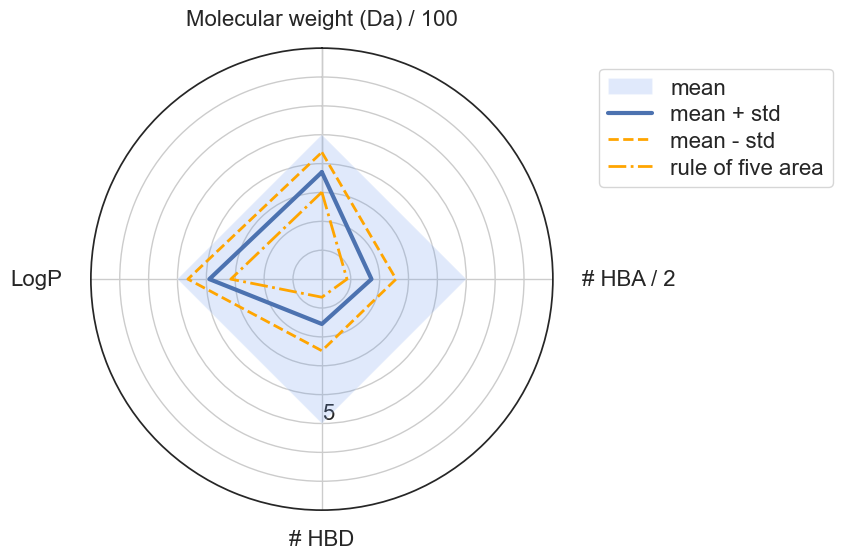

In [75]:
plot_radar(
    molecules_stats,
    thresholds,
    scaled_threshold,
    properties_labels,
    y_max,
)

In [76]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

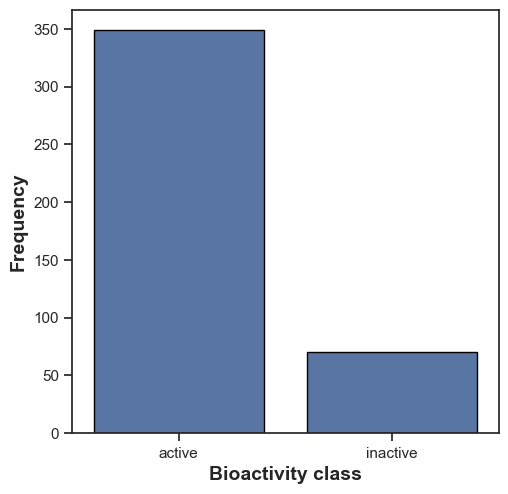

In [77]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=molecules, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.png', dpi=600, bbox_inches='tight')

In [78]:
molecules

,molecule_chembl_id,IC50,units,smiles,pIC50,class,molecular_weight,logp,n_hbd,n_hba,passes_ro5
0,CHEMBL247044,0.2,nM,CC(=O)C1=NN(c2cc(C)ccc2F)C[C@@]1(CCCN(C)C)c1cc...,9.698970,active,381.495,4.17892,0.0,4.0,True
1,CHEMBL4239814,0.2,nM,CC(=O)C1=NN(c2cc(C)ccc2F)C[C@]1(CCCN(C)C)c1ccccc1,9.698970,active,381.495,4.17892,0.0,4.0,True
2,CHEMBL398478,0.4,nM,CC(=O)C1=NN2c3cc(F)ccc3OC[C@H]2[C@@]1(CCCN1CCO...,9.397940,active,437.515,3.40210,0.0,6.0,True
3,CHEMBL250127,0.5,nM,CC(=O)C1=NN2c3cc(F)ccc3OC[C@H]2[C@@]1(CCCN)c1c...,9.301030,active,367.424,3.02860,1.0,5.0,True
4,CHEMBL206115,0.5,nM,N[C@H](C(=O)N1CC(c2cc(F)ccc2F)=C[C@H]1c1cccc(O...,9.301030,active,370.399,3.37460,2.0,3.0,True
...,...,...,...,...,...,...,...,...,...,...,...
767,CHEMBL4239414,120000.0,nM,CC(=O)N1N=C(NC2=NC(=O)/C(=C/c3ccco3)S2)SC1(C)c...,3.920819,inactive,412.496,3.57870,1.0,7.0,True
768,CHEMBL4251217,120000.0,nM,CC(=O)N1N=C(NC2=NC(=O)/C(=C/c3ccccn3)S2)SC1(C)...,3.920819,inactive,423.523,3.38070,1.0,7.0,True
769,CHEMBL4244405,128700.0,nM,CC(=O)N1N=C(NC2=NC(=O)/C(=C/C=C/c3ccc(N(C)C)cc...,3.890421,inactive,491.642,4.60790,1.0,7.0,True
770,CHEMBL4246927,133500.0,nM,CC(=O)N1N=C(NC2=NC(=O)/C(=C/c3cccs3)S2)SC1(C)c...,3.874519,inactive,428.564,4.04720,1.0,7.0,True


C:\Users\Admin\AppData\Local\Temp\ipykernel_25912\1379332592.py:10: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(


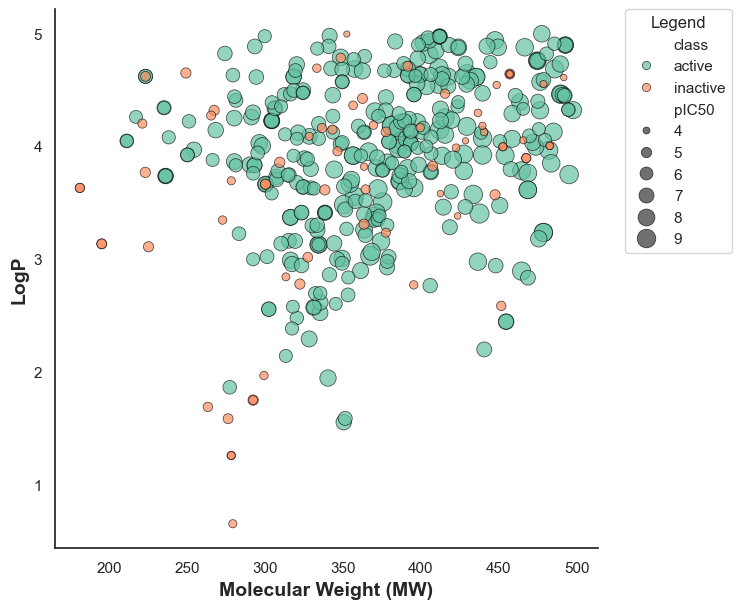

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

custom_palette = sns.color_palette("Set2")

plt.figure(figsize=(7, 7))

sns.scatterplot(
    x='molecular_weight',
    y='logp',
    data=molecules,
    hue='class',
    size='pIC50',
    sizes=(20, 200),
    palette=custom_palette,
    edgecolor='black',
    alpha=0.7
)

plt.xlabel('Molecular Weight (MW)', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.grid(False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, title='Legend')
sns.despine()
plt.savefig('plot_MW_vs_LogP.png', dpi=600, bbox_inches='tight')
plt.show()


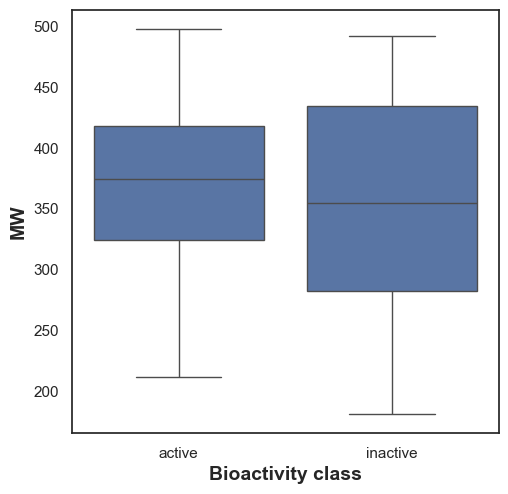

In [80]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'molecular_weight', data = molecules)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.png', dpi=600, bbox_inches='tight')

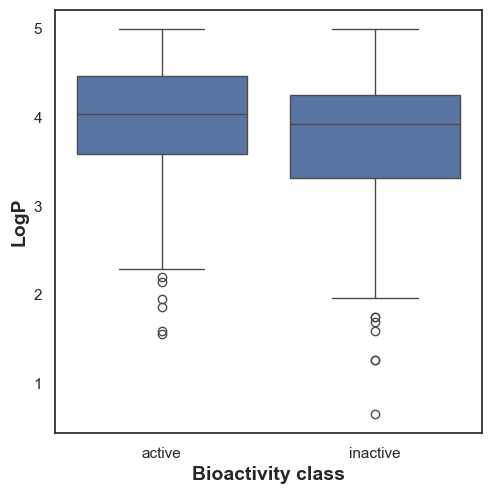

In [81]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'logp', data = molecules)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.png', dpi=600, bbox_inches='tight')

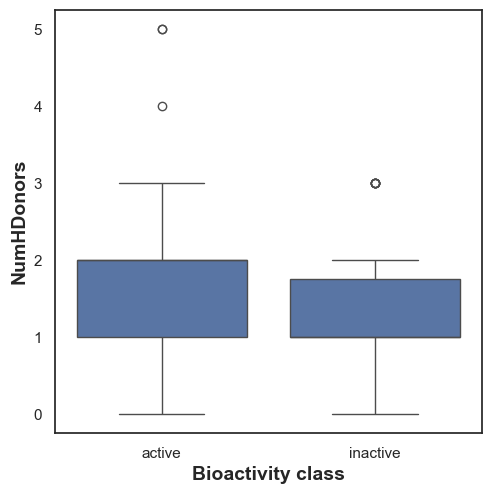

In [82]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'n_hbd', data = molecules)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.png', dpi=600, bbox_inches='tight')

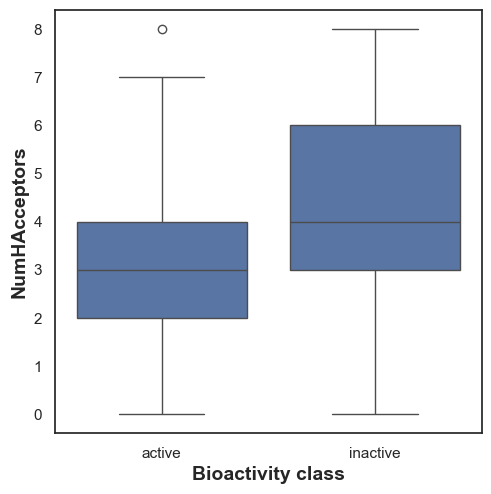

In [83]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'n_hba', data = molecules)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.png', dpi=600, bbox_inches='tight')

In [84]:
import zipfile
import os

with zipfile.ZipFile("results.zip", "w") as zipf:
    for file in os.listdir("."):
        if file.endswith(".csv") or file.endswith(".pdf"):
            zipf.write(file)
print("results.zip created!")


results.zip created!


In [85]:
molecules

,molecule_chembl_id,IC50,units,smiles,pIC50,class,molecular_weight,logp,n_hbd,n_hba,passes_ro5
0,CHEMBL247044,0.2,nM,CC(=O)C1=NN(c2cc(C)ccc2F)C[C@@]1(CCCN(C)C)c1cc...,9.698970,active,381.495,4.17892,0.0,4.0,True
1,CHEMBL4239814,0.2,nM,CC(=O)C1=NN(c2cc(C)ccc2F)C[C@]1(CCCN(C)C)c1ccccc1,9.698970,active,381.495,4.17892,0.0,4.0,True
2,CHEMBL398478,0.4,nM,CC(=O)C1=NN2c3cc(F)ccc3OC[C@H]2[C@@]1(CCCN1CCO...,9.397940,active,437.515,3.40210,0.0,6.0,True
3,CHEMBL250127,0.5,nM,CC(=O)C1=NN2c3cc(F)ccc3OC[C@H]2[C@@]1(CCCN)c1c...,9.301030,active,367.424,3.02860,1.0,5.0,True
4,CHEMBL206115,0.5,nM,N[C@H](C(=O)N1CC(c2cc(F)ccc2F)=C[C@H]1c1cccc(O...,9.301030,active,370.399,3.37460,2.0,3.0,True
...,...,...,...,...,...,...,...,...,...,...,...
767,CHEMBL4239414,120000.0,nM,CC(=O)N1N=C(NC2=NC(=O)/C(=C/c3ccco3)S2)SC1(C)c...,3.920819,inactive,412.496,3.57870,1.0,7.0,True
768,CHEMBL4251217,120000.0,nM,CC(=O)N1N=C(NC2=NC(=O)/C(=C/c3ccccn3)S2)SC1(C)...,3.920819,inactive,423.523,3.38070,1.0,7.0,True
769,CHEMBL4244405,128700.0,nM,CC(=O)N1N=C(NC2=NC(=O)/C(=C/C=C/c3ccc(N(C)C)cc...,3.890421,inactive,491.642,4.60790,1.0,7.0,True
770,CHEMBL4246927,133500.0,nM,CC(=O)N1N=C(NC2=NC(=O)/C(=C/c3cccs3)S2)SC1(C)c...,3.874519,inactive,428.564,4.04720,1.0,7.0,True


**PAINS_analysis_and_Substructure_Removal**

In [86]:
from pathlib import Path

import pandas as pd
from tqdm.auto import tqdm
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem.FilterCatalog import FilterCatalog, FilterCatalogParams

<frozen importlib._bootstrap>:241: RuntimeWarning: to-Python converter for class boost::shared_ptr<class RDKit::FilterHierarchyMatcher> already registered; second conversion method ignored.


In [87]:
new_data = pd.read_csv('ro5_properties_filtered.csv',
    index_col=0,
)

In [88]:
new_data

,molecule_chembl_id,IC50,units,smiles,pIC50,class,molecular_weight,logp,n_hbd,n_hba,passes_ro5
0,CHEMBL247044,0.2,nM,CC(=O)C1=NN(c2cc(C)ccc2F)C[C@@]1(CCCN(C)C)c1cc...,9.698970,active,381.495,4.17892,0.0,4.0,True
1,CHEMBL4239814,0.2,nM,CC(=O)C1=NN(c2cc(C)ccc2F)C[C@]1(CCCN(C)C)c1ccccc1,9.698970,active,381.495,4.17892,0.0,4.0,True
2,CHEMBL398478,0.4,nM,CC(=O)C1=NN2c3cc(F)ccc3OC[C@H]2[C@@]1(CCCN1CCO...,9.397940,active,437.515,3.40210,0.0,6.0,True
3,CHEMBL250127,0.5,nM,CC(=O)C1=NN2c3cc(F)ccc3OC[C@H]2[C@@]1(CCCN)c1c...,9.301030,active,367.424,3.02860,1.0,5.0,True
4,CHEMBL206115,0.5,nM,N[C@H](C(=O)N1CC(c2cc(F)ccc2F)=C[C@H]1c1cccc(O...,9.301030,active,370.399,3.37460,2.0,3.0,True
...,...,...,...,...,...,...,...,...,...,...,...
767,CHEMBL4239414,120000.0,nM,CC(=O)N1N=C(NC2=NC(=O)/C(=C/c3ccco3)S2)SC1(C)c...,3.920819,inactive,412.496,3.57870,1.0,7.0,True
768,CHEMBL4251217,120000.0,nM,CC(=O)N1N=C(NC2=NC(=O)/C(=C/c3ccccn3)S2)SC1(C)...,3.920819,inactive,423.523,3.38070,1.0,7.0,True
769,CHEMBL4244405,128700.0,nM,CC(=O)N1N=C(NC2=NC(=O)/C(=C/C=C/c3ccc(N(C)C)cc...,3.890421,inactive,491.642,4.60790,1.0,7.0,True
770,CHEMBL4246927,133500.0,nM,CC(=O)N1N=C(NC2=NC(=O)/C(=C/c3cccs3)S2)SC1(C)c...,3.874519,inactive,428.564,4.04720,1.0,7.0,True


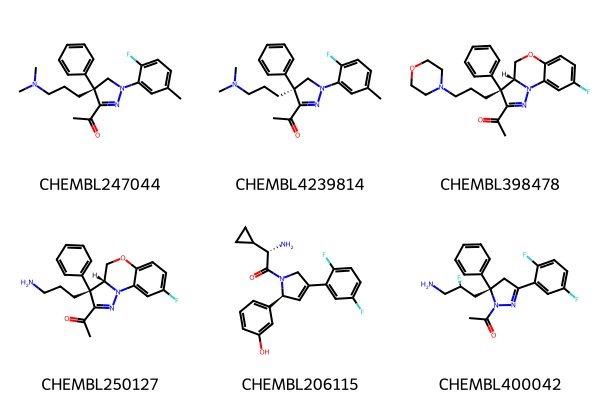

In [89]:
PandasTools.AddMoleculeColumnToFrame(new_data, smilesCol="smiles")
Chem.Draw.MolsToGridImage(
    list(new_data.head(6).ROMol),
    legends=list(new_data.head(6).molecule_chembl_id),
)

In [90]:
#Initialize filter
params = FilterCatalogParams()
params.AddCatalog(FilterCatalogParams.FilterCatalogs.PAINS)
catalog = FilterCatalog(params)

In [91]:
matches = []
clean = []
for index, row in tqdm(new_data.iterrows(), total=new_data.shape[0]):
    molecule = Chem.MolFromSmiles(row.smiles)
    entry = catalog.GetFirstMatch(molecule)
    if entry is not None:
        matches.append(
            {
                "chembl_id": row.molecule_chembl_id,
                "rdkit_molecule": molecule,
                "pains": entry.GetDescription().capitalize(),
            }
        )
    else:
        clean.append(index)

matches = pd.DataFrame(matches)
new_data = new_data.loc[clean]

  0%|          | 0/419 [00:00<?, ?it/s]

In [92]:
new_data.to_csv('molecules_after_PAINS_Filteration.csv', index=True)

In [93]:
print(f"Number of compounds with PAINS: {len(matches)}")
print(f"Number of compounds without PAINS: {len(new_data)}")

Number of compounds with PAINS: 68
Number of compounds without PAINS: 351


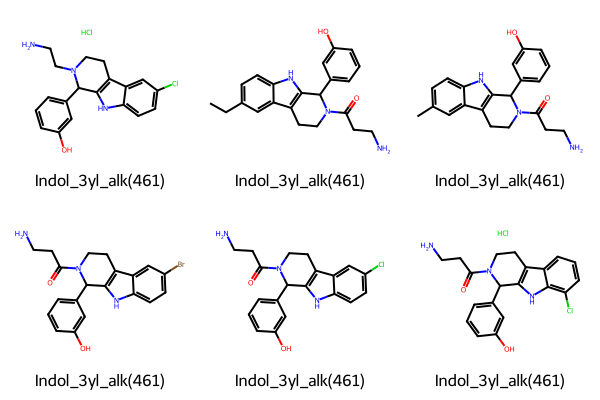

In [94]:
Chem.Draw.MolsToGridImage(
    list(matches.head(6).rdkit_molecule),
    legends=list(matches.head(6)["pains"]),
)

In [95]:
import pandas as pd
from rdkit import Chem

substructures = pd.read_csv('unwanted_substructures.csv', sep=",")
substructures["rdkit_molecule"] = substructures.smarts.apply(Chem.MolFromSmarts)
print("Number of unwanted substructures in collection:", len(substructures))

Number of unwanted substructures in collection: 102


[09:53:54] SMARTS Parse Error: syntax error while parsing: $([CH])_100,$(CC)_101]#CC(=O)O[C,c]
[09:53:54] SMARTS Parse Error: check for mistakes around position 1:
[09:53:54] $([CH])_100,$(CC)_101]#CC(=O)O[C,c]
[09:53:54] ^
[09:53:54] SMARTS Parse Error: Failed parsing SMARTS '$([CH])_100,$(CC)_101]#CC(=O)O[C,c]' for input: '$([CH]),$(CC)]#CC(=O)O[C,c]'


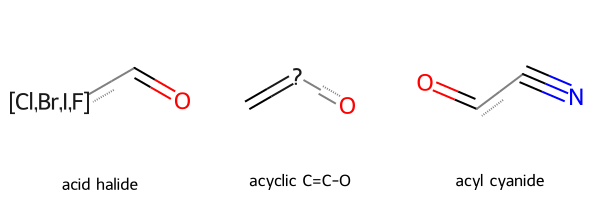

In [96]:
Chem.Draw.MolsToGridImage(
    mols=substructures.rdkit_molecule.tolist()[2:5],
    legends=substructures.name.tolist()[2:5],
)

In [97]:
substructures = substructures[substructures['rdkit_molecule'].notnull()]

In [98]:
matches = []
clean = []
for index, row in tqdm(new_data.iterrows(), total=new_data.shape[0]):
    molecule = Chem.MolFromSmiles(row.smiles)
    match = False
    for _, substructure in substructures.iterrows():
        if molecule.HasSubstructMatch(substructure.rdkit_molecule):
            matches.append(
                {
                    "chembl_id": row.molecule_chembl_id,
                    "rdkit_molecule": molecule,
                    "substructure": substructure.rdkit_molecule,
                    "substructure_name": substructure["name"],
                }
            )
            match = True
    if not match:
        clean.append(index)

matches = pd.DataFrame(matches)
new_data = new_data.loc[clean]

  0%|          | 0/351 [00:00<?, ?it/s]

In [104]:
new_data.to_csv('final_cleaned_file_from_substructures.csv', index=False)

In [99]:
print(f"Number of found unwanted substructure: {len(matches)}")
print(f"Number of compounds without unwanted substructure: {len(new_data)}")

Number of found unwanted substructure: 70
Number of compounds without unwanted substructure: 292


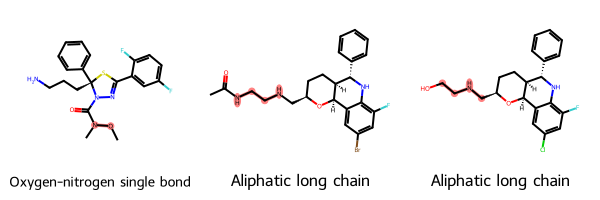

In [100]:
to_highlight = [
    row.rdkit_molecule.GetSubstructMatch(row.substructure) for _, row in matches.head(3).iterrows()
]
Chem.Draw.MolsToGridImage(
    list(matches.head(3).rdkit_molecule),
    highlightAtomLists=to_highlight,
    legends=list(matches.head(3).substructure_name),
)

In [101]:
groups = matches.groupby("substructure_name")
group_frequencies = groups.size()
group_frequencies.sort_values(ascending=False, inplace=True)
group_frequencies.head(10)

substructure_name
triphenyl methyl-silyl         16
Aliphatic long chain           12
Thiocarbonyl group             12
Oxygen-nitrogen single bond     8
nitro group                     6
aniline                         4
aldehyde                        2
imine                           2
stilbene                        2
catechol                        1
dtype: int64

In [102]:
from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm, metrics, clone
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import auc, accuracy_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score
from rdkit import Chem
from rdkit.Chem import MACCSkeys
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect
from sklearn.feature_selection import SelectFromModel

,molecule_chembl_id,IC50,units,smiles,pIC50,class,molecular_weight,logp,n_hbd,n_hba,passes_ro5,ROMol
0,CHEMBL247044,0.20,nM,CC(=O)C1=NN(c2cc(C)ccc2F)C[C@@]1(CCCN(C)C)c1cc...,9.70,active,381.50,4.18,0.00,4.00,True,
1,CHEMBL4239814,0.20,nM,CC(=O)C1=NN(c2cc(C)ccc2F)C[C@]1(CCCN(C)C)c1ccccc1,9.70,active,381.50,4.18,0.00,4.00,True,
2,CHEMBL398478,0.40,nM,CC(=O)C1=NN2c3cc(F)ccc3OC[C@H]2[C@@]1(CCCN1CCO...,9.40,active,437.52,3.40,0.00,6.00,True,
3,CHEMBL250127,0.50,nM,CC(=O)C1=NN2c3cc(F)ccc3OC[C@H]2[C@@]1(CCCN)c1c...,9.30,active,367.42,3.03,1.00,5.00,True,
4,CHEMBL206115,0.50,nM,N[C@H](C(=O)N1CC(c2cc(F)ccc2F)=C[C@H]1c1cccc(O...,9.30,active,370.40,3.37,2.00,3.00,True,
...,...,...,...,...,...,...,...,...,...,...,...,...
751,CHEMBL382835,50000.00,nM,CN(C)C(=O)N1CC(c2cc(F)ccc2F)=C[C@@H]1c1ccccc1,4.30,inactive,328.36,4.09,0.00,1.00,True,
753,CHEMBL4288725,53900.00,nM,CC(=O)NC1=NN(C(C)=O)C(c2cccc3ccccc23)S1,4.27,inactive,313.38,2.84,1.00,4.00,True,
754,CHEMBL4293322,59900.00,nM,CC(=O)NC1=NN(C(C)=O)C(C)(c2ccncc2)S1,4.22,inactive,278.34,1.26,1.00,5.00,True,
762,CHEMBL388098,76000.00,nM,CCN(CC)C(=O)c1c(NC(=O)c2cncs2)sc2c1CCCC2,4.12,inactive,363.51,3.82,1.00,5.00,True,

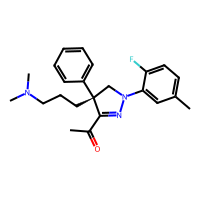
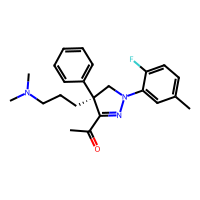
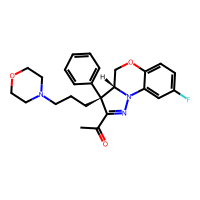
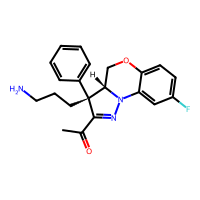
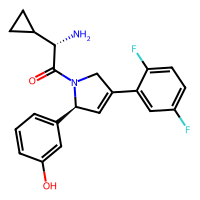
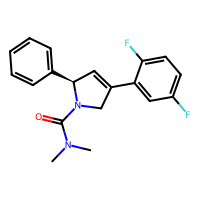
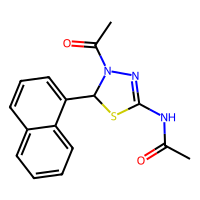
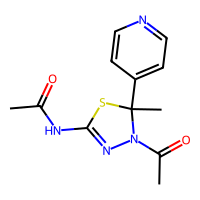
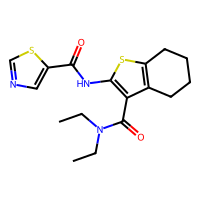
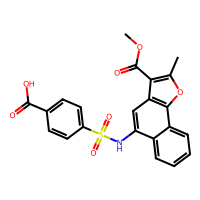

In [103]:
new_data

**Machine learning**

In [104]:
chembl_df1 = pd.read_csv(
    "final_cleaned_file_from_substructures.csv",    #read descriptors csv
    index_col=0
)

In [105]:
chembl_df1

,IC50,units,smiles,pIC50,class,molecular_weight,logp,n_hbd,n_hba,passes_ro5,ROMol
molecule_chembl_id,,,,,,,,,,,
CHEMBL247044,0.20,nM,CC(=O)C1=NN(c2cc(C)ccc2F)C[C@@]1(CCCN(C)C)c1cc...,9.70,active,381.50,4.18,0.00,4.00,True,<rdkit.Chem.rdchem.Mol object at 0x000001F37D1...
CHEMBL4239814,0.20,nM,CC(=O)C1=NN(c2cc(C)ccc2F)C[C@]1(CCCN(C)C)c1ccccc1,9.70,active,381.50,4.18,0.00,4.00,True,<rdkit.Chem.rdchem.Mol object at 0x000001F3000...
CHEMBL398478,0.40,nM,CC(=O)C1=NN2c3cc(F)ccc3OC[C@H]2[C@@]1(CCCN1CCO...,9.40,active,437.52,3.40,0.00,6.00,True,<rdkit.Chem.rdchem.Mol object at 0x000001F3000...
CHEMBL250127,0.50,nM,CC(=O)C1=NN2c3cc(F)ccc3OC[C@H]2[C@@]1(CCCN)c1c...,9.30,active,367.42,3.03,1.00,5.00,True,<rdkit.Chem.rdchem.Mol object at 0x000001F3000...
CHEMBL206115,0.50,nM,N[C@H](C(=O)N1CC(c2cc(F)ccc2F)=C[C@H]1c1cccc(O...,9.30,active,370.40,3.37,2.00,3.00,True,<rdkit.Chem.rdchem.Mol object at 0x000001F3000...
...,...,...,...,...,...,...,...,...,...,...,...
CHEMBL382835,50000.00,nM,CN(C)C(=O)N1CC(c2cc(F)ccc2F)=C[C@@H]1c1ccccc1,4.30,inactive,328.36,4.09,0.00,1.00,True,<rdkit.Chem.rdchem.Mol object at 0x000001F3013...
CHEMBL4288725,53900.00,nM,CC(=O)NC1=NN(C(C)=O)C(c2cccc3ccccc23)S1,4.27,inactive,313.38,2.84,1.00,4.00,True,<rdkit.Chem.rdchem.Mol object at 0x000001F3013...
CHEMBL4293322,59900.00,nM,CC(=O)NC1=NN(C(C)=O)C(C)(c2ccncc2)S1,4.22,inactive,278.34,1.26,1.00,5.00,True,<rdkit.Chem.rdchem.Mol object at 0x000001F3013...


In [106]:
# remove NaN, if present
chembl_df2 = chembl_df1.dropna()

In [107]:
chembl_df2.shape

(292, 11)

In [108]:
chembl_df2.columns.tolist()

['IC50',
 'units',
 'smiles',
 'pIC50',
 'class',
 'molecular_weight',
 'logp',
 'n_hbd',
 'n_hba',
 'passes_ro5',
 'ROMol']

In [109]:
chembl_df2.index

Index(['CHEMBL247044', 'CHEMBL4239814', 'CHEMBL398478', 'CHEMBL250127',
       'CHEMBL206115', 'CHEMBL400042', 'CHEMBL241754', 'CHEMBL251142',
       'CHEMBL240704', 'CHEMBL399378',
       ...
       'CHEMBL4279312', 'CHEMBL2031572', 'CHEMBL1688932', 'CHEMBL194076',
       'CHEMBL4283892', 'CHEMBL382835', 'CHEMBL4288725', 'CHEMBL4293322',
       'CHEMBL388098', 'CHEMBL1551717'],
      dtype='object', name='molecule_chembl_id', length=292)

In [110]:
chembl_df2 = chembl_df2.reset_index()

In [111]:
# Keep only the columns we want
chembl_df3 = chembl_df2[["molecule_chembl_id", "smiles", "pIC50", "class"]]
chembl_df3.head()

,molecule_chembl_id,smiles,pIC50,class
0,CHEMBL247044,CC(=O)C1=NN(c2cc(C)ccc2F)C[C@@]1(CCCN(C)C)c1cc...,9.70,active
1,CHEMBL4239814,CC(=O)C1=NN(c2cc(C)ccc2F)C[C@]1(CCCN(C)C)c1ccccc1,9.70,active
2,CHEMBL398478,CC(=O)C1=NN2c3cc(F)ccc3OC[C@H]2[C@@]1(CCCN1CCO...,9.40,active
3,CHEMBL250127,CC(=O)C1=NN2c3cc(F)ccc3OC[C@H]2[C@@]1(CCCN)c1c...,9.30,active
4,CHEMBL206115,N[C@H](C(=O)N1CC(c2cc(F)ccc2F)=C[C@H]1c1cccc(O...,9.30,active


In [112]:
chembl_df4 = chembl_df3.reset_index()
chembl_df4

,index,molecule_chembl_id,smiles,pIC50,class
0,0,CHEMBL247044,CC(=O)C1=NN(c2cc(C)ccc2F)C[C@@]1(CCCN(C)C)c1cc...,9.70,active
1,1,CHEMBL4239814,CC(=O)C1=NN(c2cc(C)ccc2F)C[C@]1(CCCN(C)C)c1ccccc1,9.70,active
2,2,CHEMBL398478,CC(=O)C1=NN2c3cc(F)ccc3OC[C@H]2[C@@]1(CCCN1CCO...,9.40,active
3,3,CHEMBL250127,CC(=O)C1=NN2c3cc(F)ccc3OC[C@H]2[C@@]1(CCCN)c1c...,9.30,active
4,4,CHEMBL206115,N[C@H](C(=O)N1CC(c2cc(F)ccc2F)=C[C@H]1c1cccc(O...,9.30,active
...,...,...,...,...,...
287,287,CHEMBL382835,CN(C)C(=O)N1CC(c2cc(F)ccc2F)=C[C@@H]1c1ccccc1,4.30,inactive
288,288,CHEMBL4288725,CC(=O)NC1=NN(C(C)=O)C(c2cccc3ccccc23)S1,4.27,inactive
289,289,CHEMBL4293322,CC(=O)NC1=NN(C(C)=O)C(C)(c2ccncc2)S1,4.22,inactive
290,290,CHEMBL388098,CCN(CC)C(=O)c1c(NC(=O)c2cncs2)sc2c1CCCC2,4.12,inactive


In [133]:
chembl_df4.to_csv('KIF20A_train.csv', index=False)

In [113]:
print(chembl_df4['class'].value_counts())
print(chembl_df4['class'].value_counts(normalize=True) * 100)

class
active      250
inactive     42
Name: count, dtype: int64
class
active     85.62
inactive   14.38
Name: proportion, dtype: float64


In [114]:
selection = ['smiles', 'molecule_chembl_id']     #select columns we want to retain
act_selected = chembl_df4[selection]
act_selected.to_csv('molecule.smi', sep='\t', index=False, header=False )

In [115]:
with open("padel.sh", "r") as file:
    print(file.read())

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv



In [116]:
import subprocess
cmd = [
    "java", "-Xms2G", "-Xmx2G", "-Djava.awt.headless=true",
    "-jar", "PaDEL-Descriptor/PaDEL-Descriptor.jar",  
    "-dir", "molecule_directory/",
    "-file", "descriptors_output.csv"
]

subprocess.run(cmd, check=True)

CompletedProcess(args=['java', '-Xms2G', '-Xmx2G', '-Djava.awt.headless=true', '-jar', 'PaDEL-Descriptor/PaDEL-Descriptor.jar', '-dir', 'molecule_directory/', '-file', 'descriptors_output.csv'], returncode=0)

In [118]:
import subprocess

cmd = [
    "java", "-Xms4G", "-Xmx8G", "-Djava.awt.headless=true",
    "-jar", "PaDEL-Descriptor/PaDEL-Descriptor.jar",
    "-dir", "molecule_directory/",
    "-file", "descriptors_output.csv",
    "-2d", "-fingerprints",
    "-standardizenitro", "-removesalt", "-retainorder",
    "-threads", "12"  # ← Use all 12 threads
]

print("Using 12 threads...")

# Stream logs live
with subprocess.Popen(cmd, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True) as proc:
    for line in proc.stdout:
        print(line.strip())

Using 12 threads...
Processing CHEMBL247044 in molecule.smi (1/292).
Processing CHEMBL398478 in molecule.smi (3/292).
Processing CHEMBL4239814 in molecule.smi (2/292).
Processing CHEMBL250127 in molecule.smi (4/292).
Processing CHEMBL206115 in molecule.smi (5/292).
Processing CHEMBL400042 in molecule.smi (6/292).
Processing CHEMBL241754 in molecule.smi (7/292).
Processing CHEMBL251142 in molecule.smi (8/292).
Processing CHEMBL1829430 in molecule.smi (12/292).
Processing CHEMBL240704 in molecule.smi (9/292).
Processing CHEMBL399378 in molecule.smi (10/292).
Processing CHEMBL250126 in molecule.smi (11/292).
Processing CHEMBL240497 in molecule.smi (13/292). Average speed: 1.09 s/mol.
Processing CHEMBL429553 in molecule.smi (14/292). Average speed: 3.26 s/mol.
Processing CHEMBL1277017 in molecule.smi (15/292). Average speed: 1.10 s/mol.
Processing CHEMBL381526 in molecule.smi (16/292). Average speed: 0.84 s/mol.
Processing CHEMBL246603 in molecule.smi (17/292). Average speed: 0.84 s/mol.
P

In [119]:
actx = pd.read_csv('descriptors_output.csv') #padel generates a file called 'descriptors_output.csv'
actx 

,Name,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL247044,0,0.42,0.18,60.76,63.81,12,12,56,28,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL4239814,0,0.42,0.18,60.76,63.81,12,12,56,28,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL398478,0,-0.74,0.54,69.35,68.93,12,12,60,32,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL250127,0,-1.39,1.94,50.21,57.09,12,12,49,27,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL206115,0,-0.60,0.37,48.21,55.21,12,12,47,27,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,CHEMBL382835,0,0.77,0.59,40.29,49.56,12,12,42,24,...,0,0,0,0,0,0,0,0,0,0
288,CHEMBL4288725,0,0.03,0.00,42.90,45.97,10,11,37,22,...,0,0,0,0,0,0,0,0,0,0
289,CHEMBL4293322,0,-0.03,0.00,47.92,39.36,6,6,33,19,...,0,0,0,0,0,0,0,0,0,0
290,CHEMBL388098,0,0.36,0.13,65.59,54.63,10,10,45,24,...,0,0,0,0,0,0,0,0,0,0


In [120]:
type(actx)

pandas.core.frame.DataFrame

In [121]:
actx = actx[['Name'] + [col for col in actx.columns if col.startswith('PubchemFP')]]

In [122]:
print(actx)

              Name  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  \
0     CHEMBL247044           1           1           1           0   
1    CHEMBL4239814           1           1           1           0   
2     CHEMBL398478           1           1           1           0   
3     CHEMBL250127           1           1           1           0   
4     CHEMBL206115           1           1           1           0   
..             ...         ...         ...         ...         ...   
287   CHEMBL382835           1           1           1           0   
288  CHEMBL4288725           1           1           0           0   
289  CHEMBL4293322           1           1           0           0   
290   CHEMBL388098           1           1           1           0   
291  CHEMBL1551717           1           1           1           0   

     PubchemFP4  PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  ...  \
0             0           0           0           0           0  ...   
1             0

In [123]:
chembl_df4['class'] = chembl_df4['pIC50'].apply(lambda x: 1 if x >= 6 else 0)

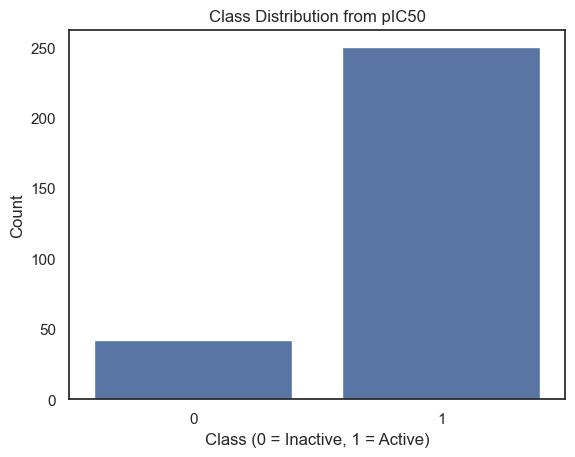

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='class', data=chembl_df4)
plt.title("Class Distribution from pIC50")
plt.xlabel("Class (0 = Inactive, 1 = Active)")
plt.ylabel("Count")
plt.show()

In [125]:
actx_final = actx.drop('Name', axis=1)
actx_final

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
288,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
289,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
290,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [126]:
print("actx_final shape:", actx_final.shape)
print("chembl_df4 shape:", chembl_df4.shape)
print("class counts:", chembl_df4['class'].value_counts())


actx_final shape: (292, 881)
chembl_df4 shape: (292, 5)
class counts: class
1    250
0     42
Name: count, dtype: int64


In [127]:
X = actx_final                  #descriptors
Y = chembl_df4.pIC50  #bioactivity class

In [128]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

In [129]:
print(Y.value_counts())

pIC50
9.00    6
8.28    5
8.70    5
8.40    5
8.74    4
       ..
6.78    1
6.77    1
9.40    1
6.75    1
4.10    1
Name: count, Length: 207, dtype: int64


In [130]:
Y

0     9.70
1     9.70
2     9.40
3     9.30
4     9.30
      ... 
287   4.30
288   4.27
289   4.22
290   4.12
291   4.10
Name: pIC50, Length: 292, dtype: float64

In [131]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP12,PubchemFP15,PubchemFP16,PubchemFP19,PubchemFP23,PubchemFP24,PubchemFP33,PubchemFP143,PubchemFP145,...,PubchemFP713,PubchemFP716,PubchemFP734,PubchemFP737,PubchemFP758,PubchemFP776,PubchemFP779,PubchemFP797,PubchemFP800,PubchemFP821
0,1,1,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,1,1,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,1,1,1,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1,1,1,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
288,0,1,1,0,1,0,0,1,1,0,...,0,0,1,0,0,0,0,1,0,0
289,0,0,1,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
290,1,1,1,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [132]:
# Spliting data in 70\30 ratio
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=44)

In [133]:
# Seeing the data that was prepared
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((204, 194), (204,), (88, 194), (88,))

In [134]:
Y_train

110   7.30
275   4.60
58    8.28
122   7.22
238   6.09
      ... 
96    7.43
59    8.28
173   6.70
241   6.07
276   4.60
Name: pIC50, Length: 204, dtype: float64

In [153]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.6743267073464037

In [154]:
X.isnull().sum()
Y.isnull().sum()

0

In [142]:
Y_pred = model.predict(X_test)

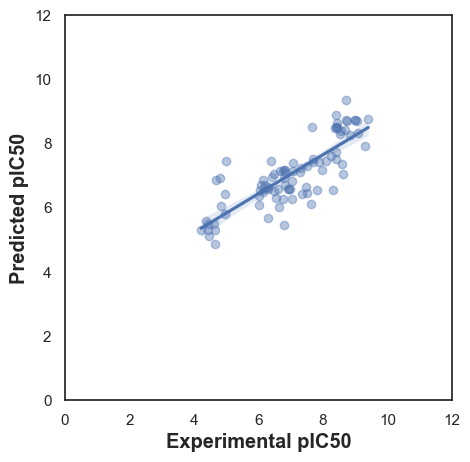

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)

plt.show()



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_model = RandomForestRegressor(random_state=100)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=10, scoring='r2', verbose=1)
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_rf_model = RandomForestRegressor(**best_params, random_state=100)

best_rf_model.fit(X_train, Y_train)

r2 = best_rf_model.score(X_test, Y_test)
print("Best R2 score:", r2)
print("Best parameters:", best_params)
     

In [ ]:
from sklearn.ensemble import RandomForestRegressor

best_params = {
    'n_estimators': 200,
    'max_depth': None,
    'min_samples_split': 2,
    'min_samples_leaf': 4,
    'max_features': 'log2',
    'random_state': 100
}

final_rf_model = RandomForestRegressor(**best_params)

final_rf_model.fit(X_train, Y_train)

r2 = final_rf_model.score(X_test, Y_test)
print("R2 score on testing data:", r2)

In [135]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000993 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 582
[LightGBM] [Info] Number of data points in the train set: 204, number of used features: 194
[LightGBM] [Info] Start training from score 6.927828
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 582
[LightGBM] [Info] Number of data points in the train set: 204, number of used features: 194
[LightGBM] [Info] Start training from score 6.927828
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [136]:
# Performance table of the training set (70% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.14,0.96,0.25,0.03
ExtraTreeRegressor,0.14,0.96,0.25,0.03
ExtraTreesRegressor,0.14,0.96,0.25,1.13
GaussianProcessRegressor,0.14,0.96,0.25,0.05
XGBRegressor,0.14,0.96,0.25,1.34
LinearRegression,-0.70,0.92,0.34,0.01
TransformedTargetRegressor,-0.70,0.92,0.34,0.02
RandomForestRegressor,-1.12,0.91,0.39,0.94
GradientBoostingRegressor,-1.19,0.90,0.39,0.25


In [138]:
# Performance table of the training set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,73191755435132707652040425992655213988503325482...,-9001744633976092376096580816304370423870542385...,13053734916273757131858648152296369048502717644...,0.07
RANSACRegressor,2663349448773217550336.00,-3275613689870509146112.00,78744056495.73,0.57
KernelRidge,21.16,-23.79,6.85,0.01
GaussianProcessRegressor,18.76,-20.84,6.43,0.04
TransformedTargetRegressor,18.76,-20.84,6.43,0.01
LinearRegression,18.76,-20.84,6.43,0.02
LinearSVR,1.83,-0.01,1.39,0.09
LassoLars,1.82,-0.01,1.38,0.02
DummyRegressor,1.82,-0.01,1.38,0.01


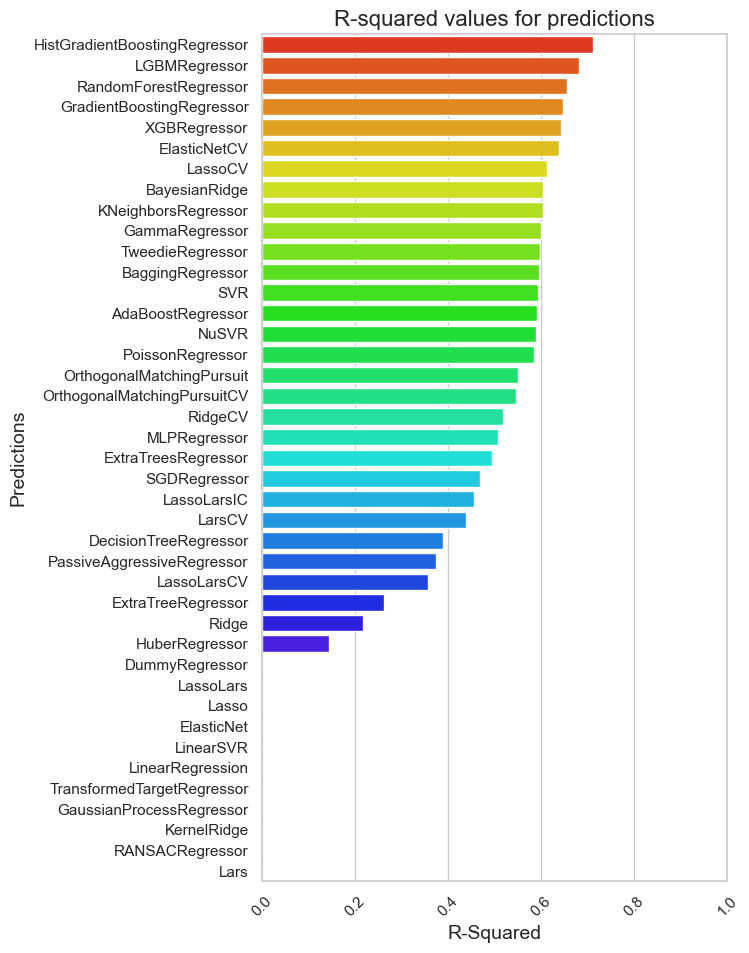

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns


palette = sns.color_palette("hsv", len(predictions_test))
plt.figure(figsize=(6, 11))
sns.set_theme(style="whitegrid")
predictions_test_sorted = predictions_test.sort_values(by="R-Squared", ascending=False)
ax = sns.barplot(y=predictions_test_sorted.index, x="R-Squared", data=predictions_test_sorted, palette=palette)
ax.set(xlim=(0, 1))
plt.title('R-squared values for predictions', fontsize=16)
plt.xlabel('R-Squared', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(rotation=45)
plt.savefig('R_Squared.png', dpi=600, bbox_inches='tight')
plt.show()


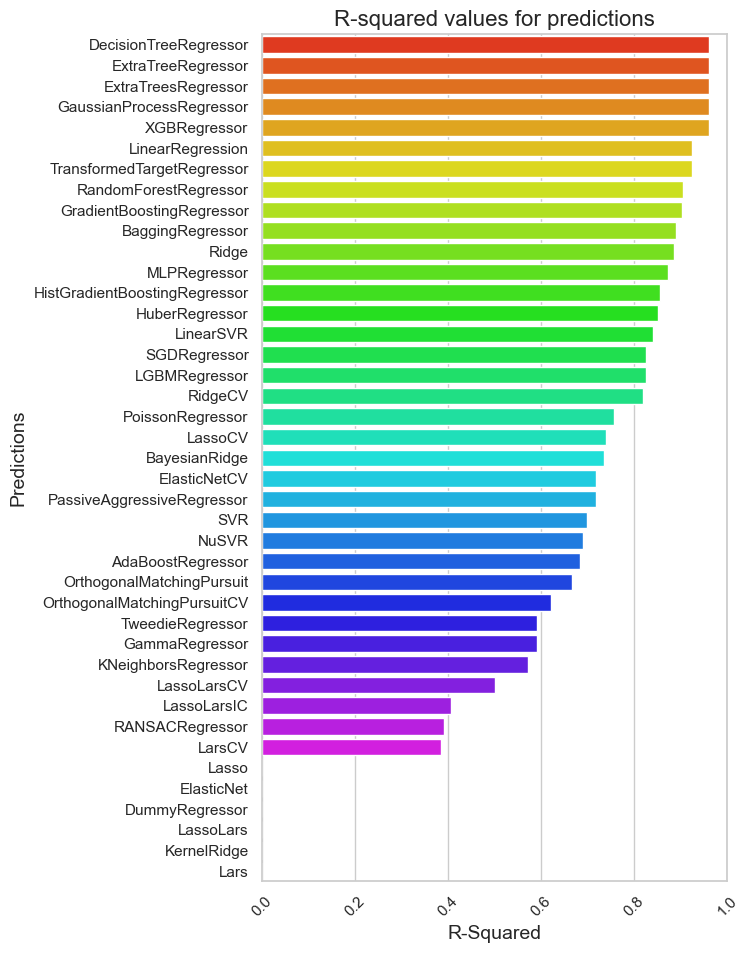

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns


palette = sns.color_palette("hsv", len(predictions_train))
plt.figure(figsize=(6, 11))
sns.set_theme(style="whitegrid")
predictions_train_sorted = predictions_train.sort_values(by="R-Squared", ascending=False)
ax = sns.barplot(y=predictions_train_sorted.index, x="R-Squared", data=predictions_train_sorted, palette=palette)
ax.set(xlim=(0, 1))
plt.title('R-squared values for predictions', fontsize=16)
plt.xlabel('R-Squared', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(rotation=45)
plt.savefig('R_Squared.png', dpi=600, bbox_inches='tight')
plt.show()

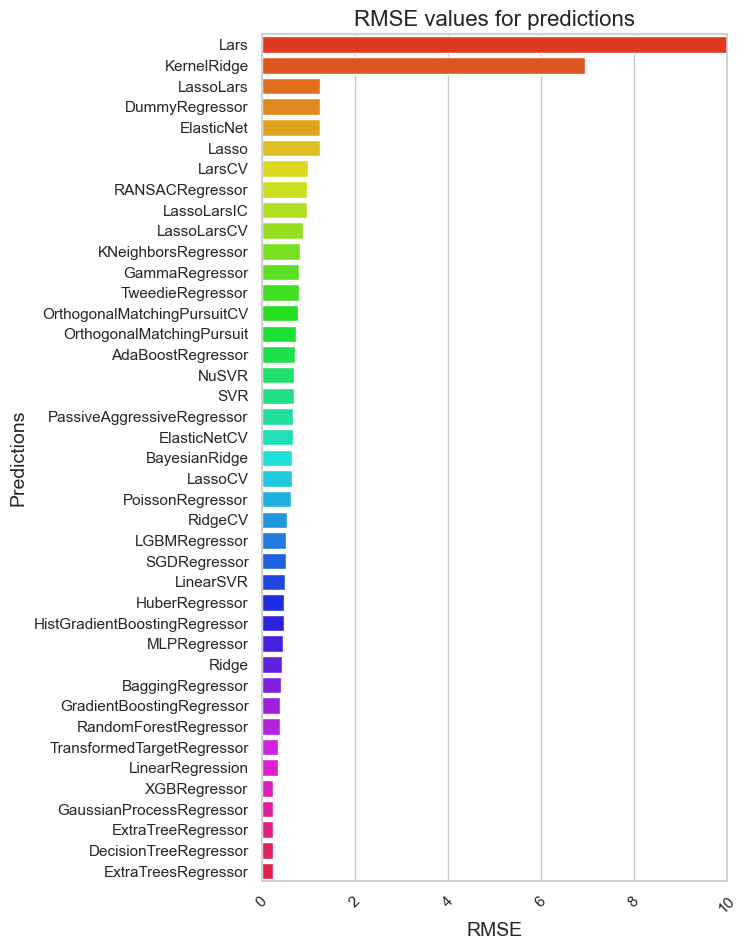

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("hsv", len(predictions_train))

plt.figure(figsize=(6, 11))
sns.set_theme(style="whitegrid")
predictions_train_sorted = predictions_train.sort_values(by="RMSE", ascending=False)
ax = sns.barplot(y=predictions_train_sorted.index, x="RMSE", data=predictions_train_sorted, palette=palette)
ax.set(xlim=(0, 10))
plt.title('RMSE values for predictions', fontsize=16)
plt.xlabel('RMSE', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(rotation=45)
plt.savefig('RMSE.png', dpi=600, bbox_inches='tight')
plt.show()


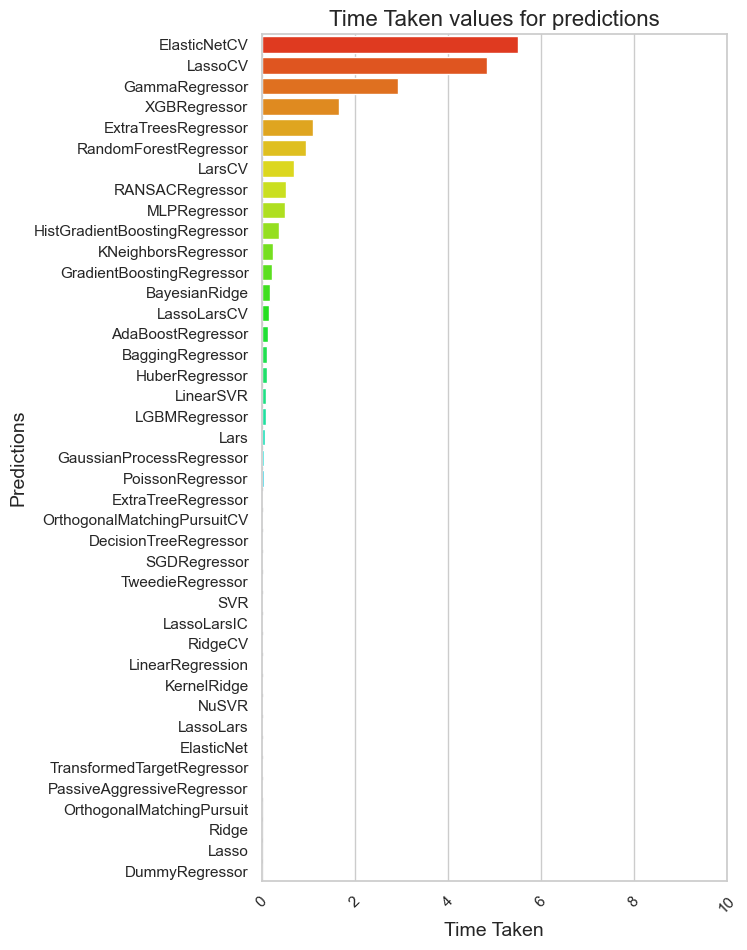

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("hsv", len(predictions_train))

plt.figure(figsize=(6, 11))
sns.set_theme(style="whitegrid")
predictions_train_sorted = predictions_train.sort_values(by="Time Taken", ascending=False)
ax = sns.barplot(x="Time Taken", y=predictions_train_sorted.index, data=predictions_train_sorted, palette=palette)
ax.set(xlim=(0, 10))
plt.title('Time Taken values for predictions', fontsize=16)
plt.xlabel('Time Taken', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(rotation=45)
plt.savefig('Time_Taken.png', dpi=600, bbox_inches='tight')
plt.show()


In [139]:
print(len(Y_test), len(Y_pred))
print(type(Y_test), type(Y_pred))

NameError: name 'Y_pred' is not defined

In [140]:
from sklearn.ensemble import HistGradientBoostingRegressor

lazy_et = HistGradientBoostingRegressor(random_state=100)
lazy_et.fit(X_train, Y_train)
print("R2 (Lazy defaults):", lazy_et.score(X_test, Y_test))

R2 (Lazy defaults): 0.7124200766022888


In [141]:
Y_pred = lazy_et.predict(X_test)

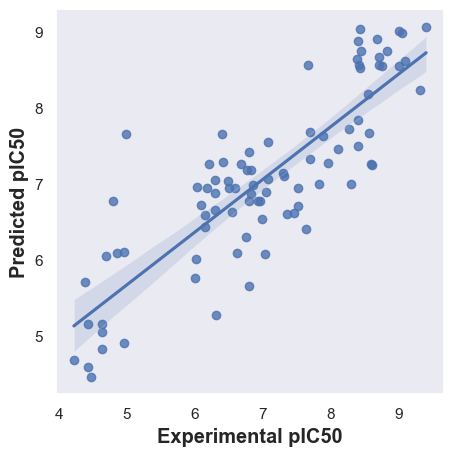

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ensure data is in correct format
Y_test = pd.Series(Y_test).reset_index(drop=True)
Y_pred = pd.Series(Y_pred).reset_index(drop=True)

sns.set(color_codes=True)
sns.set_style("dark")

plt.figure(figsize=(5, 5))
ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha': 0.8})

ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

plt.savefig('Regression_Model.png', dpi=600, bbox_inches='tight')
plt.show()


In [143]:
#Validation
external_data = pd.read_csv("fda.csv", index_col=0)
print(external_data.shape)
external_data.head()

(1615, 22)


,SMILES,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
ZINC_ID,,,,,,,,,,,,,,,,,,,,,
ZINC000001530427,C[C@@H]1O[C@@H]1P(=O)(O)O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZINC000003807804,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZINC000000120286,Nc1nc(N)c2nc(-c3ccccc3)c(N)nc2n1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZINC000242548690,C[C@H]1O[C@@H](O[C@H]2[C@@H](O)C[C@H](O[C@H]3[...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZINC000000008492,Oc1cccc2cccnc12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
import pandas as pd

# Load CSV where drug names are in the row index
external_data = pd.read_csv("fda.csv", index_col=0)

In [145]:
external_data = external_data.reset_index()


In [146]:
external_data = external_data[['ZINC_ID','SMILES']]  # Only keep those two
external_data.columns = ['ZINC_ID','SMILES']            # Rename cleanly



In [147]:
print(external_data.columns.tolist())
print(len(external_data))

['ZINC_ID', 'SMILES']
1615


In [171]:
selection = ['SMILES']     #select columns we want to retain
act_selected_2 = external_data[selection]
act_selected_2.to_csv('ext_molecule.smi', sep='\t', index=False, header=False )

In [172]:
with open("padel.sh", "r") as file:
    print(file.read())

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv



In [ ]:
import subprocess

cmd = [
    "java", "-Xms4G", "-Xmx8G", "-Djava.awt.headless=true",
    "-jar", "PaDEL-Descriptor/PaDEL-Descriptor.jar",
    "-dir", "molecule_directory/",
    "-file", "ext_descriptors_output.csv",
    "-2d", "-fingerprints",
    "-standardizenitro", "-removesalt", "-retainorder",
    "-threads", "12"  # ← Use all 12 threads
]

print("Using 12 threads...")

# Stream logs live
with subprocess.Popen(cmd, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True) as proc:
    for line in proc.stdout:
        print(line.strip())

In [148]:
import pandas as pd

# Load descriptor output from PaDEL
fda_fp_df = pd.read_csv("ext_descriptors_output.csv")

# Preview columns to find fingerprint columns (should be PubchemFP1 to PubchemFP881)
print(fda_fp_df.columns[:10])

Index(['Name', 'PubchemFP0', 'PubchemFP1', 'PubchemFP2', 'PubchemFP3',
       'PubchemFP4', 'PubchemFP5', 'PubchemFP6', 'PubchemFP7', 'PubchemFP8'],
      dtype='object')


In [149]:
#Select only Pubchem FingerPrints
# Get all fingerprint columns
fp_cols = [col for col in fda_fp_df.columns if col.startswith("PubchemFP")]

# Prepare input features for prediction
X_external = fda_fp_df[fp_cols].values.astype(float)


In [150]:
X_external

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [151]:
trained_fp_cols = X_train.columns.tolist()

In [152]:
X_external_aligned = fda_fp_df[trained_fp_cols].values.astype(float)

In [153]:
# Predict pIC50 for FDA drugs
predicted_pIC50 = lazy_et.predict(X_external_aligned)
fda_fp_df["predicted_pIC50"] = predicted_pIC50


In [154]:
external_data = pd.read_csv("fda.csv")  # Ensure this matches PaDEL input order
external_data = external_data.reset_index(drop=True)

# Merge predictions with drug info
fda_screened = external_data.join(fda_fp_df["predicted_pIC50"])

In [155]:
# Filter high predicted activity (e.g., pIC50 > 6)
top_hits = fda_screened[fda_screened["predicted_pIC50"] > 6]

# Sort descending by pIC50
top_hits_sorted = top_hits.sort_values(by="predicted_pIC50", ascending=False)

# View top 10
print(top_hits_sorted.head(10))

              ZINC_ID                                             SMILES  \
328  ZINC000100037885  N#C[C@@H]1C[C@@H]2C[C@@H]2N1C(=O)[C@@H](N)C12C...   
318  ZINC000013648755  N#C[C@@H]1C[C@@H]2C[C@@H]2N1C(=O)[C@@H](N)C12C...   
69   ZINC000028108825  O=C(O)CN(CCN(CC(=O)O)C[C@H](CO[P@](=O)(O)OC1CC...   
715  ZINC000001996117  NC(=O)C(c1ccccc1)(c1ccccc1)[C@@H]1CCN(CCc2ccc3...   
161  ZINC000053229445  C=CC[N+]1([C@H]2C[C@H]3[C@@H]4CC[C@H]5C[C@H](O...   
686  ZINC000004097404  CC(=O)O[C@H]1C[C@@H]2CC[C@@H]3[C@H](CC[C@@]4(C...   
98   ZINC000004097383  CC(=O)O[C@H]1C[C@@H]2CC[C@@H]3[C@H](CC[C@@]4(C...   
869  ZINC000000403533  COc1ccc2c3c1O[C@H]1C(=O)CC[C@@]4(O)[C@@H](C2)N...   
260  ZINC000245204949  C[N@+]1(CC2CC2)CC[C@]23c4c5ccc(O)c4O[C@H]2C(=O...   
429  ZINC000003875483  CN1CC[C@]23c4c5ccc(O)c4O[C@H]2C(=O)CC[C@@]3(O)...   

     Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  \
328         NaN         NaN         NaN         NaN         NaN         NaN   
318  

In [181]:
top_hits_sorted.to_csv("top_predicted_fda_hits.csv", index=False)
print("✅ Top hits saved to 'top_predicted_fda_hits.csv'")

✅ Top hits saved to 'top_predicted_fda_hits.csv'


GRADIO

In [11]:
# gradio_padel_autopipeline_lazy_full.py
import os
import io
import json
import shutil
import tempfile
import subprocess
from typing import Dict, List, Tuple, Optional

# ---------- FORCE MULTI-CORE ----------
NUM_CORES_DEFAULT = 12
os.environ.setdefault("OMP_NUM_THREADS", str(NUM_CORES_DEFAULT))
os.environ.setdefault("MKL_NUM_THREADS", str(NUM_CORES_DEFAULT))
os.environ.setdefault("OPENBLAS_NUM_THREADS", str(NUM_CORES_DEFAULT))
os.environ.setdefault("NUMEXPR_NUM_THREADS", str(NUM_CORES_DEFAULT))

import gradio as gr
import numpy as np
import pandas as pd
import joblib

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import r2_score

from sklearn.linear_model import (
    Lars, RANSACRegressor, LinearRegression, LassoLars, ElasticNet, Lasso,
    HuberRegressor, Ridge, PassiveAggressiveRegressor, LarsCV, LassoLarsCV, LassoLarsIC,
    SGDRegressor, OrthogonalMatchingPursuit, OrthogonalMatchingPursuitCV, PoissonRegressor,
    RidgeCV, BayesianRidge, LassoCV, ElasticNetCV, TweedieRegressor, GammaRegressor
)
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.compose import TransformedTargetRegressor
from sklearn.svm import SVR, LinearSVR, NuSVR   # <-- FIXED: LinearSVR import
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor,
    BaggingRegressor, HistGradientBoostingRegressor
)
from sklearn.dummy import DummyRegressor
from sklearn.neural_network import MLPRegressor

In [12]:
# Optional external libs
try:
    from xgboost import XGBRegressor
    HAVE_XGB = True
except Exception:
    HAVE_XGB = False

try:
    from lightgbm import LGBMRegressor
    HAVE_LGBM = True
except Exception:
    HAVE_LGBM = False

In [13]:
# -----------------------------
# Config
# -----------------------------
DEFAULT_THRESHOLD = 6.5
DEFAULT_TARGET = "pIC50"
DEFAULT_SMILES = "SMILES"
DEFAULT_NAME = "Name"
DEFAULT_FEATURE_PREFIX = "PubchemFP"

DEFAULT_PADEL_JAR = os.path.join("PaDEL-Descriptor", "PaDEL-Descriptor.jar")
DEFAULT_THREADS = NUM_CORES_DEFAULT
RANDOM_STATE = 44

In [14]:
# Utilities
# -----------------------------
def _autodetect_col(df: pd.DataFrame, candidates: List[str]) -> Optional[str]:
    cols_lower = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand.lower() in cols_lower:
            return cols_lower[cand.lower()]
    return None

def _ensure_numeric(df: pd.DataFrame) -> pd.DataFrame:
    return df.apply(pd.to_numeric, errors="coerce").replace([np.inf, -np.inf], np.nan).fillna(0.0)

def _select_fp_columns(df: pd.DataFrame, prefix: str = DEFAULT_FEATURE_PREFIX) -> List[str]:
    fps = [c for c in df.columns if str(c).startswith(prefix)]
    if not fps:
        fps = [c for c in df.columns if str(c).lower().startswith(prefix.lower())]
    if not fps:
        raise ValueError(f"No fingerprint columns with prefix '{prefix}' in PaDEL output.")
    return fps

def _all_positive(y: np.ndarray) -> bool:
    return np.all(np.asarray(y) > 0)


In [15]:
# PaDEL integration
# -----------------------------
def write_smi_from_csv(df: pd.DataFrame, smiles_col: str, name_col: Optional[str], out_smi: str) -> None:
    rows = []
    for i, r in df.iterrows():
        smi = str(r[smiles_col]).strip()
        if not smi or smi.lower() == "nan":
            continue
        nm = str(r[name_col]).strip() if name_col and name_col in df.columns else f"mol_{i}"
        rows.append(f"{smi}\t{nm}\n")
    if not rows:
        raise ValueError("No valid SMILES found in uploaded CSV.")
    with open(out_smi, "w", encoding="utf-8") as f:
        f.writelines(rows)

def run_padel(
    smi_file: str,
    out_csv: str,
    padel_jar: str = DEFAULT_PADEL_JAR,
    threads: int = DEFAULT_THREADS,
    xms: str = "2G",
    xmx: str = "16G",
    extra_flags: Optional[List[str]] = None,
) -> str:
    """Run PaDEL; returns captured log text."""
    if extra_flags is None:
        extra_flags = ["-2d", "-fingerprints", "-standardizenitro", "-removesalt", "-retainorder"]

    if not (os.path.exists(padel_jar) or shutil.which("padel.sh")):
        raise FileNotFoundError("PaDEL not found. Provide PaDEL-Descriptor.jar or have padel.sh on PATH.")

    in_dir = tempfile.mkdtemp(prefix="padel_in_")
    local_smi = os.path.join(in_dir, os.path.basename(smi_file))
    shutil.copyfile(smi_file, local_smi)

    cmd = [
        "java", f"-Xms{xms}", f"-Xmx{xmx}", "-Djava.awt.headless=true",
        "-jar", padel_jar,
        "-dir", in_dir,
        "-file", out_csv,
        "-threads", str(int(threads)),
        *extra_flags,
    ]

    log_buf = io.StringIO()
    log_buf.write("Running PaDEL:\n" + " ".join(cmd) + "\n\n")
    with subprocess.Popen(cmd, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True) as proc:
        for line in proc.stdout:
            log_buf.write(line)
    return log_buf.getvalue()

In [16]:
# Build model zoo (LazyRegressor-like)
# -----------------------------
def build_model_candidates(n_jobs: int, fast_mode: bool, y: Optional[np.ndarray] = None) -> Dict[str, Pipeline]:
    positive_only = _all_positive(y) if y is not None else False

    models: Dict[str, Pipeline] = {
        "LinearRegression": Pipeline([("model", LinearRegression())]),  # <-- FIXED: no n_jobs
        "Ridge": Pipeline([("scaler", StandardScaler()), ("model", Ridge(random_state=RANDOM_STATE))]),
        "RidgeCV": Pipeline([("scaler", StandardScaler()), ("model", RidgeCV())]),
        "Lasso": Pipeline([("scaler", StandardScaler()), ("model", Lasso(random_state=RANDOM_STATE, max_iter=5000))]),
        "ElasticNet": Pipeline([("scaler", StandardScaler()), ("model", ElasticNet(random_state=RANDOM_STATE, max_iter=5000))]),
        "BayesianRidge": Pipeline([("scaler", StandardScaler()), ("model", BayesianRidge())]),
        "LassoCV": Pipeline([("scaler", StandardScaler()), ("model", LassoCV(max_iter=5000))]),
        "ElasticNetCV": Pipeline([("scaler", StandardScaler()), ("model", ElasticNetCV(max_iter=5000))]),
        "OrthogonalMatchingPursuit": Pipeline([("scaler", StandardScaler()), ("model", OrthogonalMatchingPursuit())]),
        "OrthogonalMatchingPursuitCV": Pipeline([("scaler", StandardScaler()), ("model", OrthogonalMatchingPursuitCV())]),
        "Lars": Pipeline([("scaler", StandardScaler()), ("model", Lars())]),
        "LarsCV": Pipeline([("scaler", StandardScaler()), ("model", LarsCV())]),
        "LassoLars": Pipeline([("scaler", StandardScaler()), ("model", LassoLars())]),
        "LassoLarsCV": Pipeline([("scaler", StandardScaler()), ("model", LassoLarsCV())]),
        "LassoLarsIC": Pipeline([("scaler", StandardScaler()), ("model", LassoLarsIC())]),
        "HuberRegressor": Pipeline([("scaler", StandardScaler()), ("model", HuberRegressor())]),
        "SGDRegressor": Pipeline([("scaler", StandardScaler()), ("model", SGDRegressor(random_state=RANDOM_STATE, max_iter=5000))]),
        "PassiveAggressiveRegressor": Pipeline([("scaler", StandardScaler()), ("model", PassiveAggressiveRegressor(random_state=RANDOM_STATE, max_iter=2000))]),
        "KernelRidge": Pipeline([("scaler", StandardScaler()), ("model", KernelRidge())]),
        "LinearSVR": Pipeline([("scaler", StandardScaler()), ("model", LinearSVR(random_state=RANDOM_STATE, max_iter=5000))]),
        "SVR": Pipeline([("scaler", StandardScaler()), ("model", SVR(kernel="rbf"))]),
        "NuSVR": Pipeline([("scaler", StandardScaler()), ("model", NuSVR())]),
        "KNeighborsRegressor": Pipeline([("scaler", StandardScaler()), ("model", KNeighborsRegressor(n_neighbors=7))]),
        "DecisionTreeRegressor": Pipeline([("model", DecisionTreeRegressor(random_state=RANDOM_STATE))]),
        "ExtraTreeRegressor": Pipeline([("model", ExtraTreeRegressor(random_state=RANDOM_STATE))]),
        "RandomForestRegressor": Pipeline([("model", RandomForestRegressor(n_estimators=800, random_state=RANDOM_STATE, n_jobs=n_jobs))]),
        "ExtraTreesRegressor": Pipeline([("model", ExtraTreesRegressor(n_estimators=800, random_state=RANDOM_STATE, n_jobs=n_jobs))]),
        "GradientBoostingRegressor": Pipeline([("model", GradientBoostingRegressor(random_state=RANDOM_STATE))]),
        "HistGradientBoostingRegressor": Pipeline([("model", HistGradientBoostingRegressor(random_state=RANDOM_STATE))]),
        "AdaBoostRegressor": Pipeline([("model", AdaBoostRegressor(random_state=RANDOM_STATE, n_estimators=400))]),
        "BaggingRegressor": Pipeline([("model", BaggingRegressor(random_state=RANDOM_STATE, n_estimators=200, n_jobs=n_jobs))]),
        "MLPRegressor": Pipeline([("scaler", StandardScaler()), ("model", MLPRegressor(random_state=RANDOM_STATE, max_iter=400))]),
        "DummyRegressor": Pipeline([("model", DummyRegressor())]),
        "RANSACRegressor": Pipeline([("scaler", StandardScaler()), ("model", RANSACRegressor(random_state=RANDOM_STATE))]),
        "GaussianProcessRegressor": Pipeline([("scaler", StandardScaler()), ("model", GaussianProcessRegressor(random_state=RANDOM_STATE))]),
        "TransformedTargetRegressor": Pipeline([
            ("scaler", StandardScaler()),
            ("model", TransformedTargetRegressor(regressor=Ridge(random_state=RANDOM_STATE), transformer=PowerTransformer()))
        ]),
    }

    if positive_only:
        models.update({
            "PoissonRegressor": Pipeline([("scaler", StandardScaler()), ("model", PoissonRegressor(max_iter=300))]),
            "GammaRegressor": Pipeline([("scaler", StandardScaler()), ("model", GammaRegressor(max_iter=300))]),
            "TweedieRegressor": Pipeline([("scaler", StandardScaler()), ("model", TweedieRegressor(power=1.5, max_iter=300))]),
        })

    if HAVE_XGB:
        models["XGBRegressor"] = Pipeline([("model", XGBRegressor(
            n_estimators=800, max_depth=6, subsample=0.9, colsample_bytree=0.9,
            learning_rate=0.05, n_jobs=n_jobs, random_state=RANDOM_STATE, tree_method="hist"))])
    if HAVE_LGBM:
        models["LGBMRegressor"] = Pipeline([("model", LGBMRegressor(
            n_estimators=1200, num_leaves=63, subsample=0.9, colsample_bytree=0.9,
            learning_rate=0.05, n_jobs=n_jobs, random_state=RANDOM_STATE))])

    if fast_mode:
        keep = {
            "HistGradientBoostingRegressor",
            "ExtraTreesRegressor",
            "RandomForestRegressor",
            "Ridge", "ElasticNet", "SVR",
        }
        if HAVE_XGB: keep.add("XGBRegressor")
        if HAVE_LGBM: keep.add("LGBMRegressor")
        models = {k: v for k, v in models.items() if k in keep}

    return models

def select_best_model(X: pd.DataFrame, y: np.ndarray, mode: str, n_jobs: int, fast_mode: bool) -> Tuple[str, float, Dict[str, float]]:
    models = build_model_candidates(n_jobs=n_jobs, fast_mode=fast_mode, y=y)
    scores: Dict[str, float] = {}
    if mode == "CV R2":
        n_splits = 3 if fast_mode else 5
        cv = KFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_STATE)
        for name, pipe in models.items():
            try:
                cv_score = cross_val_score(pipe, X, y, scoring="r2", cv=cv, n_jobs=n_jobs)
                scores[name] = float(np.nanmean(cv_score))
            except Exception:
                scores[name] = float("-inf")
    else:
        Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)
        for name, pipe in models.items():
            try:
                pipe.fit(Xtr, ytr)
                yp = pipe.predict(Xte)
                scores[name] = r2_score(yte, yp)
            except Exception:
                scores[name] = float("-inf")
    best_name = max(scores, key=scores.get)
    return best_name, scores[best_name], scores

In [17]:
# End-to-end steps
# -----------------------------
def prepare_training_descriptors(train_csv: str, target_col: str, padel_jar: str, threads: int):
    tr = pd.read_csv(train_csv)
    smiles_col = _autodetect_col(tr, ["SMILES", "smiles", "canonical_smiles", "Smile"]) or DEFAULT_SMILES
    name_col = _autodetect_col(tr, [DEFAULT_NAME, "DrugName", "ID", "Compound"]) or DEFAULT_NAME
    if target_col not in tr.columns:
        raise ValueError(f"Target column '{target_col}' not found in training CSV.")
    tmp = tempfile.mkdtemp(prefix="train_")
    smi = os.path.join(tmp, "train.smi")
    write_smi_from_csv(tr, smiles_col, name_col, smi)
    out_csv = os.path.join(tmp, "train_desc.csv")
    log_tr = run_padel(smi, out_csv, padel_jar=padel_jar, threads=threads)
    desc = pd.read_csv(out_csv)
    fp_cols = _select_fp_columns(desc)
    if DEFAULT_NAME in desc.columns and name_col in tr.columns:
        desc = desc.merge(tr[[name_col, target_col]], left_on=DEFAULT_NAME, right_on=name_col, how="left")
        y = pd.to_numeric(desc[target_col], errors="coerce").values
    else:
        y = pd.to_numeric(tr[target_col], errors="coerce").values[: len(desc)]
    X = _ensure_numeric(desc[fp_cols])
    return X, y, fp_cols, log_tr

def prepare_fda_descriptors(fda_csv: str, padel_jar: str, threads: int):
    try:
        fda = pd.read_csv(fda_csv, index_col=0)
        fda.reset_index(inplace=True)
        if DEFAULT_NAME not in fda.columns:
            fda.rename(columns={fda.columns[0]: DEFAULT_NAME}, inplace=True)
    except Exception:
        fda = pd.read_csv(fda_csv)
    smiles_col = _autodetect_col(fda, ["SMILES", "smiles", "canonical_smiles", "Smile"]) or DEFAULT_SMILES
    name_col = _autodetect_col(fda, [DEFAULT_NAME, "DrugName", "Name", "ID", "Compound"]) or DEFAULT_NAME
    tmp = tempfile.mkdtemp(prefix="fda_")
    smi = os.path.join(tmp, "fda.smi")
    write_smi_from_csv(fda, smiles_col, name_col, smi)
    out_csv = os.path.join(tmp, "fda_desc.csv")
    log_fda = run_padel(smi, out_csv, padel_jar=padel_jar, threads=threads)
    desc = pd.read_csv(out_csv)
    fp_cols = _select_fp_columns(desc)
    meta_cols = [c for c in [DEFAULT_NAME, name_col, smiles_col] if c in fda.columns]
    meta = fda[meta_cols].copy()
    if DEFAULT_NAME in desc.columns and DEFAULT_NAME in meta.columns:
        merged = meta.merge(desc[[DEFAULT_NAME] + fp_cols], on=DEFAULT_NAME, how="left")
    else:
        merged = desc
    return merged, fp_cols, log_fda

def train_select_predict(X: pd.DataFrame, y: np.ndarray, fda_desc: pd.DataFrame, fp_cols: List[str],
                         mode: str, n_jobs: int, fast_mode: bool, threshold: float):
    best_name, best_score, all_scores = select_best_model(X, y, mode, n_jobs, fast_mode)
    model_zoo = build_model_candidates(n_jobs=n_jobs, fast_mode=fast_mode, y=y)
    model = model_zoo[best_name]
    model.fit(X, y)
    X_fda = _ensure_numeric(fda_desc[fp_cols])
    preds = model.predict(X_fda.values)
    out = fda_desc.copy()
    out["pred_pIC50"] = preds
    hits = out[out["pred_pIC50"] >= float(threshold)].copy()
    hits = hits.sort_values("pred_pIC50", ascending=False).reset_index(drop=True)
    model_bytes = io.BytesIO()
    joblib.dump(model, model_bytes); model_bytes.seek(0)
    feats_bytes = io.BytesIO(json.dumps(fp_cols).encode("utf-8"))
    report = {
        "best_model": best_name,
        "selection_mode": mode,
        "score": round(float(best_score), 4),
        "all_scores": {k: (None if not np.isfinite(v) else round(float(v), 4)) for k, v in all_scores.items()},
        "n_train": int(len(X)), "n_fda": int(len(fda_desc)),
        "threshold": float(threshold), "n_jobs": n_jobs, "fast_mode": fast_mode,
        "xgboost_available": HAVE_XGB, "lightgbm_available": HAVE_LGBM,
    }
    return hits, model_bytes.getvalue(), feats_bytes.getvalue(), report

In [18]:
# Gradio App
# -----------------------------
def run_app():
    with gr.Blocks(title="Protein → PaDEL (12 cores) → Lazy Model Zoo → FDA") as demo:
        gr.Markdown("### Enter protein → PaDEL (multi-core) → **LazyRegressor** model zoo by R² → FDA screening")

        with gr.Row():
            gene = gr.Textbox(label="Target Protein / Gene", value="KIF20A")
            threshold = gr.Slider(5.0, 10.0, value=DEFAULT_THRESHOLD, step=0.1, label="pIC50 threshold")
            selection_mode = gr.Radio(["CV R2", "Test R2"], value="CV R2", label="Model selection")
            fast_mode = gr.Checkbox(label="Fast mode (subset + 3-fold CV)", value=True)

        with gr.Row():
            padel_jar = gr.Textbox(label="Path to PaDEL-Descriptor.jar", value=DEFAULT_PADEL_JAR)
            threads = gr.Slider(1, 32, value=NUM_CORES_DEFAULT, step=1, label="CPU threads (PaDEL & CV)")

        gr.Markdown("**Upload data**")
        with gr.Row():
            train_csv = gr.File(label="Training CSV (SMILES + pIC50)", file_types=[".csv"], interactive=True)
            fda_csv = gr.File(label="FDA CSV (Name, SMILES). Leave empty to use ./fda.csv", file_types=[".csv"], interactive=True)

        run_btn = gr.Button("Run full pipeline (multi-core)")
        logs_train = gr.Textbox(label="PaDEL log (training)", lines=6)
        logs_fda = gr.Textbox(label="PaDEL log (FDA)", lines=6)
        summary = gr.JSON(label="Model selection summary")
        hits_tbl = gr.Dataframe(label="Predicted FDA hits (pIC50 ≥ threshold)")
        dl_hits = gr.File(label="Download hits CSV", interactive=False)
        dl_model = gr.File(label="Download best model (.pkl)", interactive=False)
        dl_feats = gr.File(label="Download feature list (.json)", interactive=False)

        def _run(gene_name, th, mode, fast, jar_path, n_threads, train_obj, fda_obj):
            n_threads = int(n_threads)
            if train_obj is None:
                raise gr.Error("Please upload the Training CSV (SMILES + pIC50).")
            train_path = train_obj.name
            if fda_obj is not None:
                fda_path = fda_obj.name
            else:
                if not os.path.exists("fda.csv"):
                    raise gr.Error("FDA CSV not provided and ./fda.csv not found.")
                fda_path = "fda.csv"

            X, y, fp_cols, log_tr = prepare_training_descriptors(train_path, DEFAULT_TARGET, jar_path, n_threads)
            fda_desc, fp_cols_fda, log_fda = prepare_fda_descriptors(fda_path, jar_path, n_threads)

            use_fp = [c for c in fp_cols if c in fp_cols_fda]
            if not use_fp:
                raise gr.Error("No overlapping fingerprint columns between training and FDA PaDEL outputs.")
            X_use = _ensure_numeric(pd.DataFrame(X, columns=fp_cols)[use_fp])

            hits, model_bytes, feats_bytes, report = train_select_predict(
                X_use, y, fda_desc, use_fp, mode, n_threads, bool(fast), float(th)
            )

            tmpdir = tempfile.mkdtemp(prefix="out_")
            hits_path = os.path.join(tmpdir, f"{gene_name}_hits_ge_{float(th):.2f}.csv")
            model_path = os.path.join(tmpdir, f"{gene_name}_{report['best_model']}.pkl")
            feats_path = os.path.join(tmpdir, f"{gene_name}_features.json")
            hits.to_csv(hits_path, index=False)
            with open(model_path, "wb") as f:
                f.write(model_bytes)
            with open(feats_path, "wb") as f:
                f.write(feats_bytes)

            return log_tr, log_fda, report, hits, hits_path, model_path, feats_path

        run_btn.click(
            _run,
            inputs=[gene, threshold, selection_mode, fast_mode, padel_jar, threads, train_csv, fda_csv],
            outputs=[logs_train, logs_fda, summary, hits_tbl, dl_hits, dl_model, dl_feats],
        )

    demo.launch(inline=False,
    inbrowser=True,
    server_name="127.0.0.1",
    server_port=None,   # or 0 → auto-pick a free port
    share=False,
    quiet=True,)

if __name__ == "__main__":
    run_app()